## Synchrony Datathon 
By Team Init to win It

### Problem Statement

The goal is to complete the following:
* Analyze and identify attribute associations to customer call reasons within the IVR system with an emphasis on calls that the IVR did not resolve (i.e, calls transferred to agent).
* Understanding the attributes, their relationship to call reasons, and the IVR’s effectiveness to address the call reason, suggest opportunities to improve overall customer experience and satisfaction. We encourage creative approaches in data analysis, visualization, and predictive modeling to address this challenge.

### Our Methodology
1) Data Pre-Processing
2) EDA (Explatory Data Analysis)
3) Data Visualizations
4) Predictive Modeling
5) Recommendations and Conclusion

In [29]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#Concatenating the csv files
data1=pd.read_csv("file_3_Mar18_Output_1.csv")
data2=pd.read_csv("file_4_Mar18_Output_1.csv")
df = pd.concat([data1, data2])


In [30]:
df.shape

(1798798, 24)

In [31]:
df.describe()

,serial,no_of_accounts_with_syf_13_march,account_balance_13_march,eservice_ind_13_march,auto_pay_enrolled_status_13_march,no_of_accounts_with_syf_18_march,account_balance_18_march,eservice_ind_18_march,auto_pay_enrolled_status_18_march
count,1.798798e+06,1.795398e+06,1.685016e+06,1.798798e+06,1.798798e+06,1.795396e+06,1.696969e+06,1.798798e+06,1.798798e+06
mean,1.497679e+10,4.938873e+00,1.317626e+03,3.295673e-01,2.248835e-02,4.948396e+00,1.317619e+03,3.339997e-01,2.272240e-02
std,5.000029e+09,3.623405e+00,1.972779e+03,4.700562e-01,1.482654e-01,3.627627e+00,1.979695e+03,4.716397e-01,1.490171e-01
min,1.000100e+10,1.000000e+00,-2.559600e+04,0.000000e+00,0.000000e+00,1.000000e+00,-2.559600e+04,0.000000e+00,0.000000e+00
25%,1.000400e+10,2.000000e+00,1.149700e+02,0.000000e+00,0.000000e+00,2.000000e+00,1.144800e+02,0.000000e+00,0.000000e+00
50%,1.003100e+10,4.000000e+00,5.715850e+02,0.000000e+00,0.000000e+00,4.000000e+00,5.686500e+02,0.000000e+00,0.000000e+00
75%,2.000307e+10,7.000000e+00,1.716582e+03,1.000000e+00,0.000000e+00,7.000000e+00,1.715620e+03,1.000000e+00,0.000000e+00
max,2.005400e+10,1.210000e+02,5.864171e+04,1.000000e+00,1.000000e+00,1.210000e+02,6.983241e+04,1.000000e+00,1.000000e+00


In [32]:
df.columns

Index(['timestamp_call_key', 'retailer_code', 'serial', 'reason', 'mos',
       'resolved', 'no_of_accounts_with_syf_13_march',
       'account_balance_13_march', 'delinquency_history_13_march',
       'account_open_date_13_march', 'account_status_13_march',
       'card_activation_status_13_march', 'eservice_ind_13_march',
       'ebill_enrolled_status_13_march', 'auto_pay_enrolled_status_13_march',
       'no_of_accounts_with_syf_18_march', 'account_balance_18_march',
       'delinquency_history_18_march', 'account_open_date_18_march',
       'account_status_18_march', 'card_activation_status_18_march',
       'eservice_ind_18_march', 'ebill_enrolled_status_18_march',
       'auto_pay_enrolled_status_18_march'],
      dtype='object')

### Section 1: Pre-Processing

Step 1: We will converting all retailer_codes to uppercase format since 1 csv file has all codes in uppercase and the other csv file has it in lowercase. This is likely an error in the dataset

In [33]:
df['retailer_code'] = df['retailer_code'].str.upper()

Step 2: There are a lot of mos values which mean the same thing, but are represented with different codes. They are:
1.   DP                               Disputes
2.   DS                               Disputes
3.    
4.    PR                                Privacy
5.    PV                                Privacy
6.    
7.    RV                               Recovery
8.    CC                               Recovery
9.    
10.   Ls                     Report lost stolen
11.   LS                     Report lost stolen
12.   
13.  MR                    SMS Account Summary
14.  TA                    SMS Account Summary
15.  TS                    SMS Account Summary
16.  
17.  Tf                    SMS Flip Activation
18.  TF                    SMS Flip Activation
19.  
20.  TR                               Transfer
21.  ss                               Transfer
22.  
23.   ER                  eService Registration
24.   eR                  eService Registration

In [34]:
code_mapping = {
    'DS': 'DP', 'PV': 'PR', 'CC': 'RV', 'Ls': 'LS',
    'TA': 'TS', 'MR': 'TS', 'Tf': 'TF', 'ss': 'TR', 'eR': 'ER'
}

def normalize_codes(mos_string):
    codes = mos_string.split()
    normalized_codes = [code_mapping.get(code, code) for code in codes]
    return ' '.join(normalized_codes)

df['mos'] = df['mos'].apply(normalize_codes)

Checking for any missing values

In [35]:
null_counts = df.isnull().sum()
print("Null/Empty counts for each column:")
print(null_counts)

Null/Empty counts for each column:
timestamp_call_key                         0
retailer_code                              0
serial                                     0
reason                                     0
mos                                        0
resolved                                   0
no_of_accounts_with_syf_13_march        3400
account_balance_13_march              113782
delinquency_history_13_march               0
account_open_date_13_march                 0
account_status_13_march              1732768
card_activation_status_13_march            0
eservice_ind_13_march                      0
ebill_enrolled_status_13_march          4936
auto_pay_enrolled_status_13_march          0
no_of_accounts_with_syf_18_march        3402
account_balance_18_march              101829
delinquency_history_18_march               0
account_open_date_18_march                 0
account_status_18_march              1703450
card_activation_status_18_march            0
eservice_ind_18_marc

Step 3: We wanted to check if any additional mapping can be done for the other columns namely 'ebill_enrolled_status_13_march' 'card_activation_status_13_march','account_status_13_march and the same for the 18th march


In [36]:
#making the mappings 
df['ebill_enrolled_status_13_march'] = df['ebill_enrolled_status_13_march'].fillna('N').replace({' ': 'N', 'D': 'B', 'L': 'B'})
df['ebill_enrolled_status_18_march'] = df['ebill_enrolled_status_18_march'].fillna('N').replace({' ': 'N', 'D': 'B', 'L': 'B'})
df['card_activation_status_13_march'] = df['card_activation_status_13_march'].fillna('1').replace({' ': '1'})
df['card_activation_status_18_march'] = df['card_activation_status_18_march'].fillna('1').replace({' ': '1'})
df['account_status_13_march'] = df['account_status_13_march'].fillna('N').replace({'E': 'C', 'F': 'C', 'I': 'C', 'Z': 'C'})
df['account_status_18_march'] = df['account_status_18_march'].fillna('N').replace({'E': 'C', 'F': 'C', 'I': 'C', 'Z': 'C'})

Step 4: Creating two columns, date of the call and the time of the call based on the timestamp key column

In [37]:
def parse_datetime(s):
    datetime_part = s.split()[0]
    date_part = datetime_part[:6]
    time_part = datetime_part[6:]
    date_parsed = datetime.strptime(date_part, '%y%m%d').date()
    time_parsed = datetime.strptime(time_part, '%H%M%S').time()
    date_str = date_parsed.strftime('%m/%d/%Y')
    return date_str, time_parsed

df['date_of_call'], df['time_of_call'] = zip(*df['timestamp_call_key'].apply(parse_datetime))

Checking for missing values

In [38]:
null_counts = df.isnull().sum()
print("Null/Empty counts for each column:")
print(null_counts)

Null/Empty counts for each column:
timestamp_call_key                        0
retailer_code                             0
serial                                    0
reason                                    0
mos                                       0
resolved                                  0
no_of_accounts_with_syf_13_march       3400
account_balance_13_march             113782
delinquency_history_13_march              0
account_open_date_13_march                0
account_status_13_march                   0
card_activation_status_13_march           0
eservice_ind_13_march                     0
ebill_enrolled_status_13_march            0
auto_pay_enrolled_status_13_march         0
no_of_accounts_with_syf_18_march       3402
account_balance_18_march             101829
delinquency_history_18_march              0
account_open_date_18_march                0
account_status_18_march                   0
card_activation_status_18_march           0
eservice_ind_18_march                    

Step 5: There are instances where we noticed that it has been shown to have a resolution of floor but then TR is not given in mos since the data has been cut off for a particular limit as mentioned by the mentors. In this case, we are adding TR to the mos.

In [39]:
count_before = df[(df['resolved'] == 'floor') & (~df['mos'].str.endswith('TR'))].shape[0]
mask = (df['resolved'] == 'floor') & (~df['mos'].str.endswith('TR'))
df.loc[mask, 'mos'] = df.loc[mask, 'mos'] + ' TR'
count_after = df[(df['resolved'] == 'floor') & (~df['mos'].str.endswith('TR'))].shape[0]

print("Number of rows where resolved = 'floor' and mos does not end with 'TR' before updating:", count_before)
print("Number of rows where resolved = 'floor' and mos does not end with 'TR' after updating:", count_after)

Number of rows where resolved = 'floor' and mos does not end with 'TR' before updating: 16140
Number of rows where resolved = 'floor' and mos does not end with 'TR' after updating: 0


### Section 2: EDA

Here, we want to explore the following columns for any correlation they might have with the resolution column as we can derive insights on how to reduce the calls that go to the floor agents thus, reducing the costs for the company

### Section 2.1: General EDA Analysis

In [40]:
print(df.columns)

Index(['timestamp_call_key', 'retailer_code', 'serial', 'reason', 'mos',
       'resolved', 'no_of_accounts_with_syf_13_march',
       'account_balance_13_march', 'delinquency_history_13_march',
       'account_open_date_13_march', 'account_status_13_march',
       'card_activation_status_13_march', 'eservice_ind_13_march',
       'ebill_enrolled_status_13_march', 'auto_pay_enrolled_status_13_march',
       'no_of_accounts_with_syf_18_march', 'account_balance_18_march',
       'delinquency_history_18_march', 'account_open_date_18_march',
       'account_status_18_march', 'card_activation_status_18_march',
       'eservice_ind_18_march', 'ebill_enrolled_status_18_march',
       'auto_pay_enrolled_status_18_march', 'date_of_call', 'time_of_call'],
      dtype='object')


In [41]:
#Numerical cols
numerical_columns = df.select_dtypes(include=['number'])
print("The Numerical Columns:")
print(numerical_columns.columns)
#Categorical cols
categorical_columns = df.select_dtypes(exclude=['number'])
print("\n The Categorical Columns:")
print(categorical_columns.columns)

The Numerical Columns:
Index(['serial', 'no_of_accounts_with_syf_13_march',
       'account_balance_13_march', 'eservice_ind_13_march',
       'auto_pay_enrolled_status_13_march', 'no_of_accounts_with_syf_18_march',
       'account_balance_18_march', 'eservice_ind_18_march',
       'auto_pay_enrolled_status_18_march'],
      dtype='object')

 The Categorical Columns:
Index(['timestamp_call_key', 'retailer_code', 'reason', 'mos', 'resolved',
       'delinquency_history_13_march', 'account_open_date_13_march',
       'account_status_13_march', 'card_activation_status_13_march',
       'ebill_enrolled_status_13_march', 'delinquency_history_18_march',
       'account_open_date_18_march', 'account_status_18_march',
       'card_activation_status_18_march', 'ebill_enrolled_status_18_march',
       'date_of_call', 'time_of_call'],
      dtype='object')


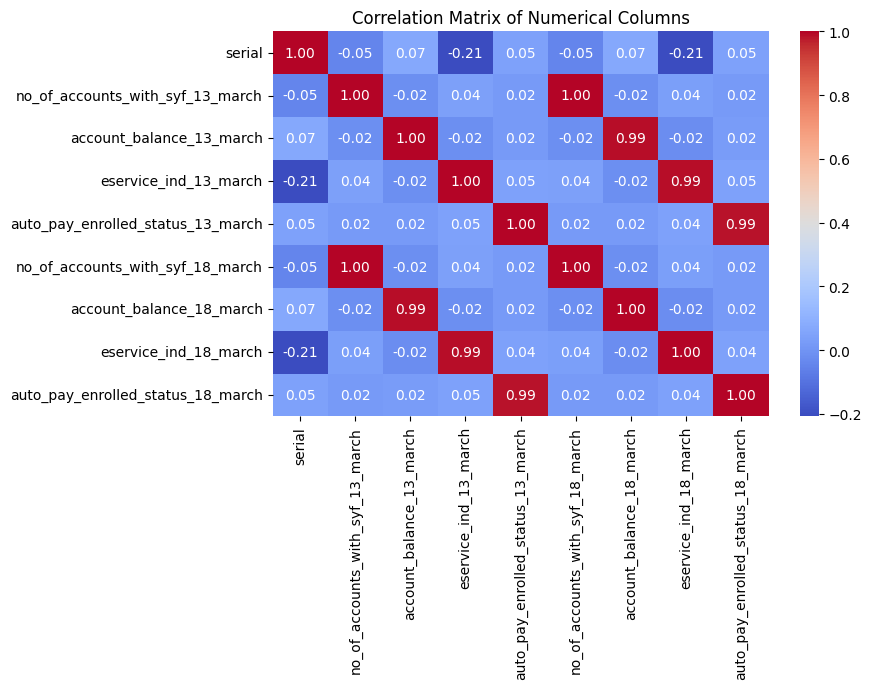

In [42]:
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

In this correlation matrix, we see very obvious observations such as high correlation between the similar columns in 13th and 18th march. We also notice negative correlation between account balance and number of accounts, which again makes sense since there usually isnt a outright obvious relationship betwen the two columns.

### Section 2:2 Retailer Code Analysis
Now, we will take a look at the Retailer code column to derive any insights related to the floor/resolved column

In [124]:
retailer_resolved_floor_counts = df.groupby(['retailer_code', 'resolved']).size().unstack(fill_value=0)
print(retailer_resolved_floor_counts)
resolution_counts = df.groupby('retailer_code')['resolved'].value_counts().unstack(fill_value=0)
resolution_counts['total'] = resolution_counts.sum(axis=1)
resolution_counts['floor_percentage'] = (resolution_counts['floor'] / resolution_counts['total']) * 100
resolution_counts_sorted = resolution_counts.sort_values(by='floor_percentage', ascending=False)
resolution_counts_reset = resolution_counts_sorted.reset_index()
print(resolution_counts_reset.value_counts)

#Calculating the weightage score for floor percentage

resolution_counts_reset['weighted_score'] = resolution_counts_reset['floor'] 
max_weighted_score = resolution_counts_reset['floor'].sum()
print(max_weighted_score)
resolution_counts_reset['weighted_score_normalized'] = resolution_counts_reset['weighted_score'] / max_weighted_score #normalized scores
resolution_counts_reset_sorted = resolution_counts_reset.sort_values(by='weighted_score_normalized', ascending=False)
print(resolution_counts_reset_sorted [['retailer_code', 'weighted_score_normalized']])

resolved        floor  resolved
retailer_code                  
A              100384    317299
B               70128    296197
C               43032    172433
D               53403    212044
E               29013    129672
F               15948     62555
G               16388     63475
H                8125     38060
I                6654     38933
J                4757     26121
K                3052     16756
L                5869     14382
M                2157     12829
N                2561     13666
O                2262     10298
P                 765      3800
Q                 876      2214
R                 300      1120
S                 184       393
T                 191       141
U                 127        77
V                   3         0
W                  22        71
X                   7        26
Y                   9        19
<bound method DataFrame.value_counts of resolved retailer_code   floor  resolved   total  floor_percentage
0                    V       

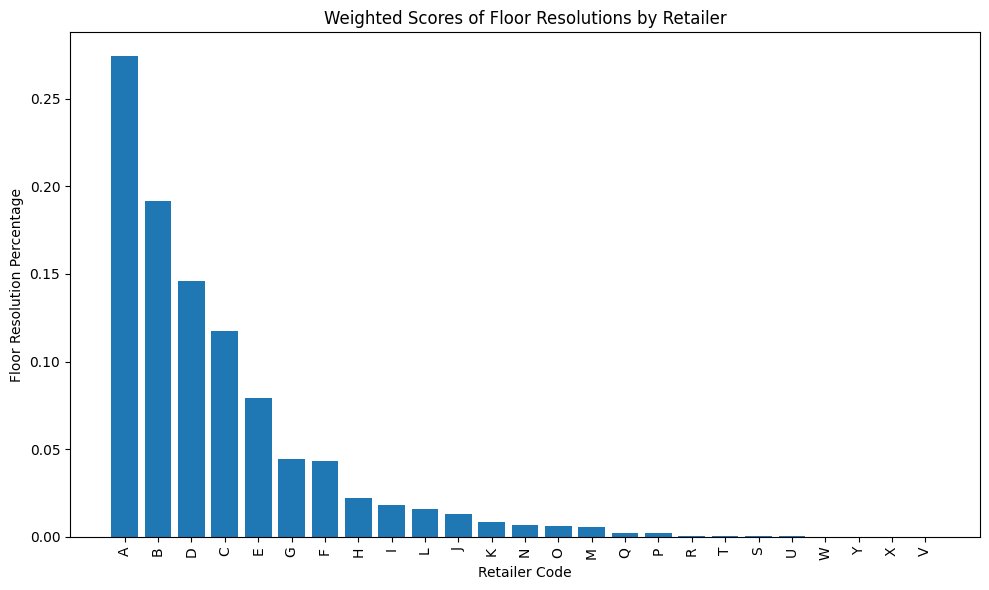

In [212]:
# Bar plot showing the percentage of the floor resolutions by the Retailer type
plt.figure(figsize=(10, 6))
plt.bar(resolution_counts_reset_sorted['retailer_code'], resolution_counts_reset_sorted['weighted_score_normalized'])
plt.xlabel('Retailer Code')
plt.ylabel('Floor Resolution Percentage')
plt.title('Weighted Scores of Floor Resolutions by Retailer')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


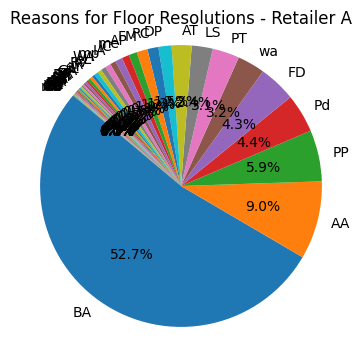

In [126]:
retailer_a_floor = df[(df['retailer_code'] == 'A') & (df['resolved'] == 'floor')]
reason_counts_a = retailer_a_floor['reason'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(reason_counts_a, labels=reason_counts_a.index, autopct='%1.1f%%', startangle=140)
plt.title('Reasons for Floor Resolutions - Retailer A')
plt.axis('equal') 
plt.show()


We can see that BA (Bank account summary) is the reason for 50% of the calls related to the Retailers A and B when the call went to the transfer agent. But it is really intresting to see that Retailer D, the reason is change of terms. This could possibly point to Retailer D being a retailer where change of terms are updated more frequently to the customers such as maybe a subscription based service or investment related company which could point it to being a company like PayPal!

### Section 2.3: Account Creation Date

Here, we look into the reasons where Account Creation Date could impact the floor/ resolved column or any other inference

In [53]:
print(df.columns)

Index(['timestamp_call_key', 'retailer_code', 'serial', 'reason', 'mos',
       'resolved', 'no_of_accounts_with_syf_13_march',
       'account_balance_13_march', 'delinquency_history_13_march',
       'account_open_date_13_march', 'account_status_13_march',
       'card_activation_status_13_march', 'eservice_ind_13_march',
       'ebill_enrolled_status_13_march', 'auto_pay_enrolled_status_13_march',
       'no_of_accounts_with_syf_18_march', 'account_balance_18_march',
       'delinquency_history_18_march', 'account_open_date_18_march',
       'account_status_18_march', 'card_activation_status_18_march',
       'eservice_ind_18_march', 'ebill_enrolled_status_18_march',
       'auto_pay_enrolled_status_18_march', 'date_of_call', 'time_of_call'],
      dtype='object')


account_open_date_13_march
2023    343890
2022    248196
2021    188173
2019    136995
2020    121549
         ...  
1959         6
1957         6
1955         2
1953         1
1952         1
Name: count, Length: 72, dtype: int64


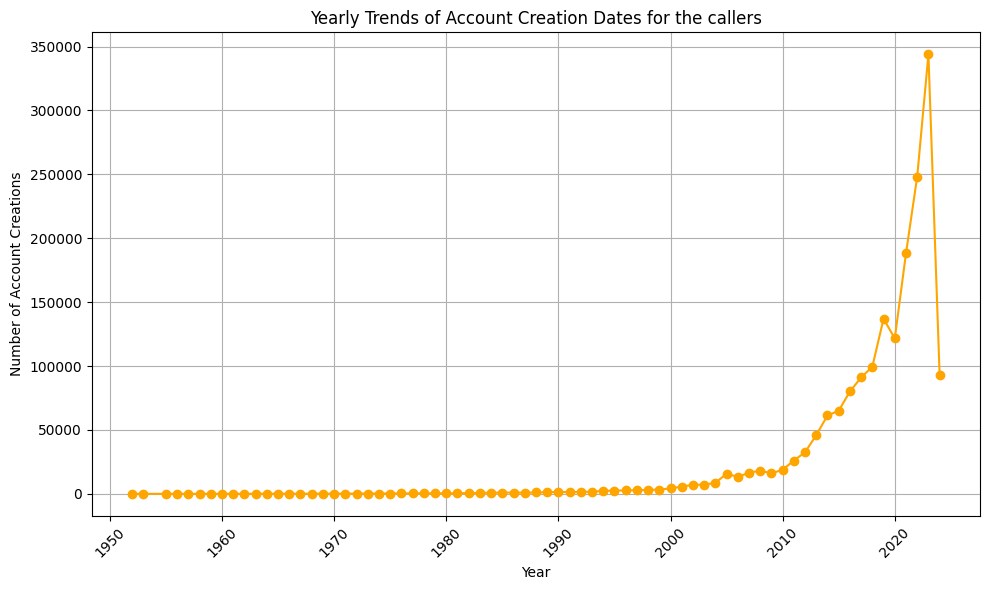

In [98]:
datetime_accountopendate = pd.to_datetime(df['account_open_date_13_march'])
yearly_counts = datetime_accountopendate.dt.year.value_counts().sort_index()
print(yearly_counts.sort_values(ascending=False))
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, color='orange',marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Account Creations')
plt.title('Yearly Trends of Account Creation Dates for the callers')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_30047/3554055323.py:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  grouped_df.resample('3Y').sum().plot(kind='bar', stacked=True, color=['skyblue', 'orange'], edgecolor='black')


<Figure size 1000x600 with 0 Axes>

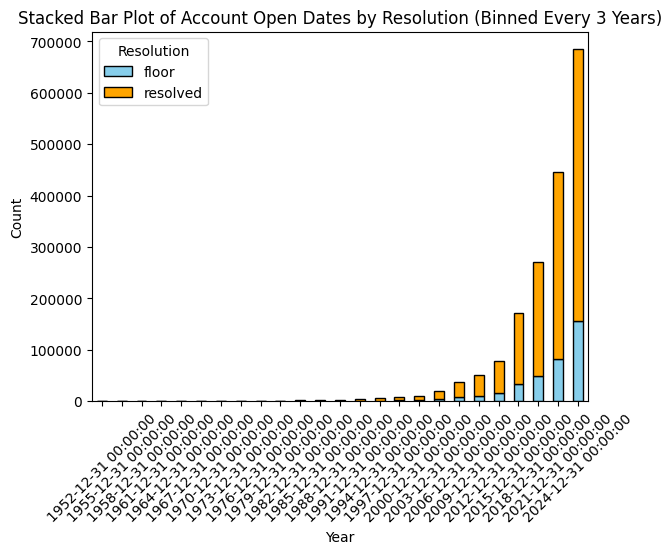

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is named df
filtered_df = df[df['resolved'].isin(['floor', 'resolved'])]

# Convert 'account_open_date_13_march' to datetime format
filtered_df['account_open_date_13_march'] = pd.to_datetime(filtered_df['account_open_date_13_march'])

# Group by 'account_open_date_13_march' and 'resolved' column and count occurrences
grouped_df = filtered_df.groupby(['account_open_date_13_march', 'resolved']).size().unstack(fill_value=0)

# Plotting stacked bar plot with larger bins (every 3 years)
plt.figure(figsize=(10, 6))
grouped_df.resample('3Y').sum().plot(kind='bar', stacked=True, color=['skyblue', 'orange'], edgecolor='black')
plt.title('Stacked Bar Plot of Account Open Dates by Resolution (Binned Every 3 Years)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Resolution')
plt.show()



/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_30047/1742023321.py:18: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  bars = grouped_df.resample('Y').sum().plot(kind='bar', stacked=True, color=['skyblue', 'orange'], edgecolor='black')


<Figure size 1000x600 with 0 Axes>

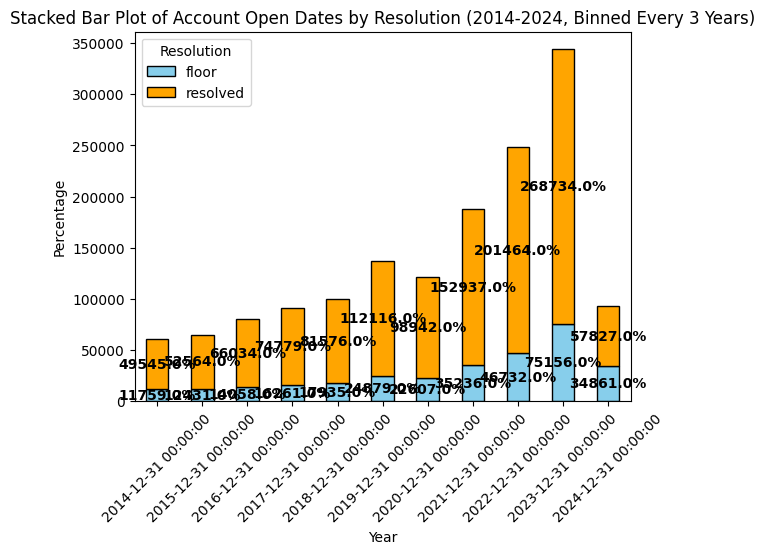

In [141]:
filtered_df = df[df['resolved'].isin(['floor', 'resolved'])]

# Convert 'account_open_date_13_march' to datetime format
filtered_df['account_open_date_13_march'] = pd.to_datetime(filtered_df['account_open_date_13_march'])

# Filter data for years 2014-2024
filtered_df = filtered_df[(filtered_df['account_open_date_13_march'].dt.year >= 2014) & (filtered_df['account_open_date_13_march'].dt.year <= 2024)]

# Group by 'account_open_date_13_march' and 'resolved' column and count occurrences
grouped_df = filtered_df.groupby(['account_open_date_13_march', 'resolved']).size().unstack(fill_value=0)

# Calculate percentage for each resolution
total_resolutions = grouped_df.sum(axis=1)
percentage_df = (grouped_df.div(total_resolutions, axis=0) * 100).round(1)

# Plotting stacked bar plot with larger bins (every 3 years)
plt.figure(figsize=(10, 6))
bars = grouped_df.resample('Y').sum().plot(kind='bar', stacked=True, color=['skyblue', 'orange'], edgecolor='black')
plt.title('Stacked Bar Plot of Account Open Dates by Resolution (2014-2024, Binned Every 3 Years)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Resolution')

# Annotate bars with percentages
for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
                 f'{height:.1f}%',
                 ha='center', va='center', color='black', fontweight='bold')

plt.show()


/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_30047/530846731.py:28: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  bars = grouped_df.resample('Y').sum().plot(kind='bar', stacked=True, color=['skyblue', 'orange'],
/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_30047/530846731.py:35: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  axs[0].set_xticks(np.arange(len(grouped_df.resample('Y').sum().index)))
/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_30047/530846731.py:36: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  axs[0].set_xticklabels([x.strftime('%Y') for x in grouped_df.resample('Y').sum().index], rotation=45)
/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_30047/530846731.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

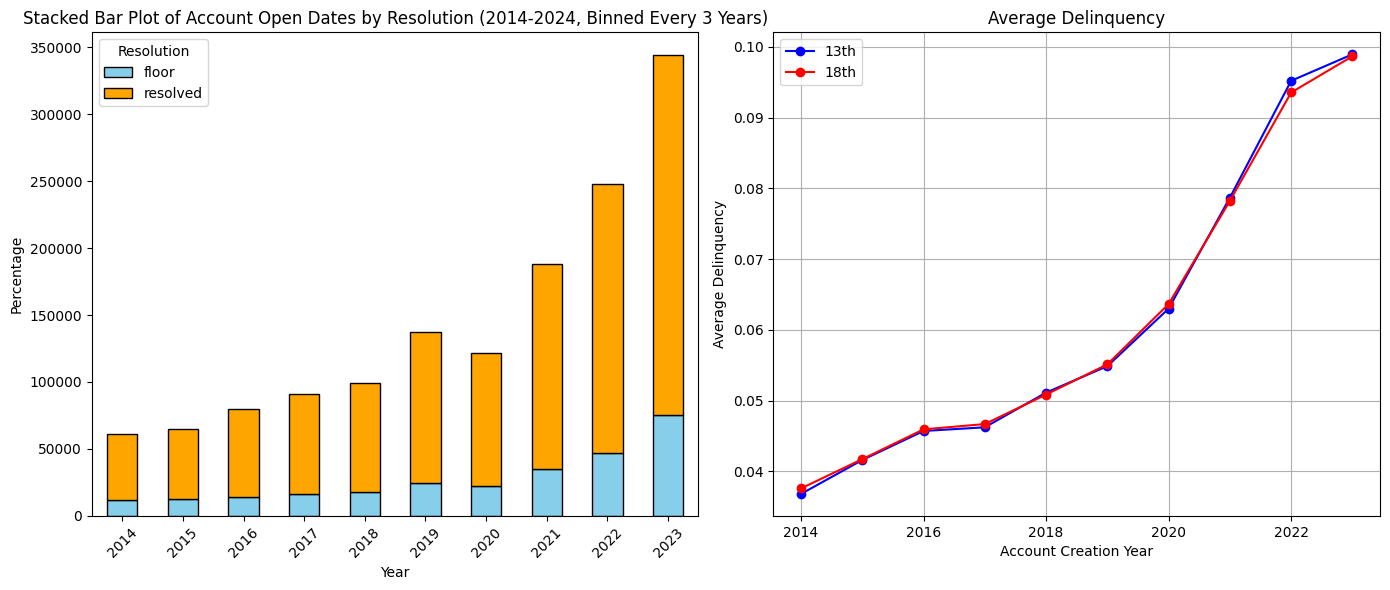

In [211]:
import pandas as pd
import matplotlib.pyplot as plt


import numpy as np

# First Plot
# Filter data for 'resolved' values 'floor' and 'resolved'
filtered_df = df[df['resolved'].isin(['floor', 'resolved'])]

# Convert 'account_open_date_13_march' to datetime format
filtered_df['account_open_date_13_march'] = pd.to_datetime(filtered_df['account_open_date_13_march'])

# Filter data for years 2014-2024
filtered_df = filtered_df[(filtered_df['account_open_date_13_march'].dt.year >= 2014) & 
                          (filtered_df['account_open_date_13_march'].dt.year <= 2023)]

# Group by 'account_open_date_13_march' and 'resolved' column and count occurrences
grouped_df = filtered_df.groupby(['account_open_date_13_march', 'resolved']).size().unstack(fill_value=0)

# Calculate percentage for each resolution
total_resolutions = grouped_df.sum(axis=1)
percentage_df = (grouped_df.div(total_resolutions, axis=0) * 100).round(1)

# Plotting stacked bar plot with larger bins (every 3 years)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

bars = grouped_df.resample('Y').sum().plot(kind='bar', stacked=True, color=['skyblue', 'orange'], 
                                           edgecolor='black', ax=axs[0])
axs[0].set_title('Stacked Bar Plot of Account Open Dates by Resolution (2014-2024, Binned Every 3 Years)')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Percentage')

# Set tick positions based on the bin edges
axs[0].set_xticks(np.arange(len(grouped_df.resample('Y').sum().index)))
axs[0].set_xticklabels([x.strftime('%Y') for x in grouped_df.resample('Y').sum().index], rotation=45)

axs[0].legend(title='Resolution')




# Define calculate_average function
def calculate_average(delinquency_value):
    # Extract the digits from the string, assuming the format is [xx]
    digits = delinquency_value.strip('[]')
    # Convert the digits to integers
    digit1 = int(digits[0])
    digit2 = int(digits[1])
    # Calculate the average
    average = (digit1 + digit2) / 2.0
    return average

# Filter out excluded values for delinquency history
exclude_values_13 = ['[20]', '[53]', '[42]', '[30]', '[40]']
exclude_values_18 = ['[20]', '[53]', '[42]', '[30]', '[80]']

filtered_df_13 = df[~df['delinquency_history_13_march'].isin(exclude_values_13)]
filtered_df_18 = df[~df['delinquency_history_18_march'].isin(exclude_values_18)]

# Apply calculate_average function to create new columns
filtered_df_13['average_delinquency_13'] = filtered_df_13['delinquency_history_13_march'].apply(calculate_average)
filtered_df_18['average_delinquency_18'] = filtered_df_18['delinquency_history_18_march'].apply(calculate_average)

# Convert 'account_open_date' columns to datetime
filtered_df_13['account_open_date_13_march'] = pd.to_datetime(filtered_df_13['account_open_date_13_march'])
filtered_df_18['account_open_date_18_march'] = pd.to_datetime(filtered_df_18['account_open_date_18_march'])

# Filter the DataFrame for the years 2014-2024
filtered_df_13 = filtered_df_13[(filtered_df_13['account_open_date_13_march'].dt.year >= 2014) & (filtered_df_13['account_open_date_13_march'].dt.year <= 2023)]
filtered_df_18 = filtered_df_18[(filtered_df_18['account_open_date_18_march'].dt.year >= 2014) & (filtered_df_18['account_open_date_18_march'].dt.year <= 2023)]

filtered_df_13['account_open_date_13_march'] = filtered_df_13['account_open_date_13_march'].dt.year
filtered_df_18['account_open_date_18_march'] = filtered_df_18['account_open_date_18_march'].dt.year

# Sample the DataFrame yearly from 2014 to 2024
yearly_sample_df_13 = filtered_df_13.groupby(filtered_df_13['account_open_date_13_march'])['average_delinquency_13'].mean()
yearly_sample_df_18 = filtered_df_18.groupby(filtered_df_18['account_open_date_18_march'])['average_delinquency_18'].mean()

# Merge the dataframes
merged_df = pd.merge(yearly_sample_df_13, yearly_sample_df_18, left_index=True, right_index=True)

# Convert index to datetime
merged_df.index = pd.to_datetime(merged_df.index, format='%Y')

# Plotting
# Plot for average delinquency on the 13th
axs[1].plot(merged_df.index.year, merged_df['average_delinquency_13'], marker='o', color='b', label='13th')
# Plot for average delinquency on the 18th
axs[1].plot(merged_df.index.year, merged_df['average_delinquency_18'], marker='o', color='r', label='18th')

axs[1].set_title('Average Delinquency')
axs[1].set_xlabel('Account Creation Year')
axs[1].set_ylabel('Average Delinquency')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


Here, we can see that surprisngly this dataset has account creation dates spanning from even 1952! The most number of calls however are regarding accounts created in 2023. 

### Section 2.4: AutoPay Enrolled status

We look into the reasons where AutoPay Enrolled status could impact the floor/ resolved column or any other inference. Here, 0 indicates Not enrolled in automatic payments and 1 indicates enrolling in automatic payments.

In [90]:
#Find the floor percentages for 13th and 18th march for 0 and 1 respectively
# Filter the DataFrame for cases where 'auto_pay_enrolled_status_13_march' is 0 and count the number of floor cases for March 13th
floor_count_13_march_0 = (df[df['auto_pay_enrolled_status_13_march'] == 0]['resolved'] == 'floor').sum()

# Filter the DataFrame for cases where 'auto_pay_enrolled_status_13_march' is 1 and count the number of floor cases for March 13th
floor_count_13_march_1 = (df[df['auto_pay_enrolled_status_13_march'] == 1]['resolved'] == 'floor').sum()

# Calculate the total number of cases for March 13th for both values of 'auto_pay_enrolled_status_13_march'
total_cases_13_march_0 = (df['auto_pay_enrolled_status_13_march'] == 0).sum()
print(total_cases_13_march_0)
total_cases_13_march_1 = (df['auto_pay_enrolled_status_13_march'] == 1).sum()
print(total_cases_13_march_1)

# Calculate the floor percentages for March 13th for both values of 'auto_pay_enrolled_status_13_march'
floor_percentage_13_march_0 = (floor_count_13_march_0 / total_cases_13_march_0) * 100
floor_percentage_13_march_1 = (floor_count_13_march_1 / total_cases_13_march_1) * 100

# Print the results
print("Floor percentage for 'auto_pay_enrolled_status_13_march' being 0 on March 13th:", floor_percentage_13_march_0)
print("Floor percentage for 'auto_pay_enrolled_status_13_march' being 1 on March 13th:", floor_percentage_13_march_1)

# Filter the DataFrame for cases where 'auto_pay_enrolled_status_18_march' is 0 and count the number of floor cases for March 18th
floor_count_18_march_0 = (df[df['auto_pay_enrolled_status_18_march'] == 0]['resolved'] == 'floor').sum()

# Filter the DataFrame for cases where 'auto_pay_enrolled_status_18_march' is 1 and count the number of floor cases for March 18th
floor_count_18_march_1 = (df[df['auto_pay_enrolled_status_18_march'] == 1]['resolved'] == 'floor').sum()

# Calculate the total number of cases for March 18th for both values of 'auto_pay_enrolled_status_18_march'
total_cases_18_march_0 = (df['auto_pay_enrolled_status_18_march'] == 0).sum()
print(total_cases_18_march_0)
total_cases_18_march_1 = (df['auto_pay_enrolled_status_18_march'] == 1).sum()
print(total_cases_18_march_1)

# Calculate the floor percentages for March 18th for both values of 'auto_pay_enrolled_status_18_march'
floor_percentage_18_march_0 = (floor_count_18_march_0 / total_cases_18_march_0) * 100
floor_percentage_18_march_1 = (floor_count_18_march_1 / total_cases_18_march_1) * 100

# Print the results
print("Floor percentage for 'auto_pay_enrolled_status_18_march' being 0 on March 18th:", floor_percentage_18_march_0)
print("Floor percentage for 'auto_pay_enrolled_status_18_march' being 1 on March 18th:", floor_percentage_18_march_1)



1758346
40452
Floor percentage for 'auto_pay_enrolled_status_13_march' being 0 on March 13th: 19.990661678645726
Floor percentage for 'auto_pay_enrolled_status_13_march' being 1 on March 13th: 36.36902996143578
1757925
40873
Floor percentage for 'auto_pay_enrolled_status_18_march' being 0 on March 18th: 19.982877540281866
Floor percentage for 'auto_pay_enrolled_status_18_march' being 1 on March 18th: 36.535120984513


In [74]:
# Count the number of cases where auto-pay status changed from 0 to 1 from March 13th to March 18th
changed_to_1 = ((df['auto_pay_enrolled_status_13_march'] == 0) & (df['auto_pay_enrolled_status_18_march'] == 1))

# Count the number of cases where auto-pay status changed from 1 to 0 from March 13th to March 18th
changed_to_0 = ((df['auto_pay_enrolled_status_13_march'] == 1) & (df['auto_pay_enrolled_status_18_march'] == 0))

# Count the number of cases where auto-pay status stayed the same from March 13th to March 18th
stayed_same = ((df['auto_pay_enrolled_status_13_march'] == df['auto_pay_enrolled_status_18_march']))


In [75]:
# Calculate the total number of cases for each category
total_changed_to_1 = len(df[changed_to_1])
total_changed_to_0 = len(df[changed_to_0])
total_stayed_same = len(df[stayed_same])

# Calculate the total number of resolved cases for each category
resolved_changed_to_1 = len(df[(changed_to_1) & (df['resolved'] == 'resolved')])
resolved_changed_to_0 = len(df[(changed_to_0) & (df['resolved'] == 'resolved')])
resolved_stayed_same = len(df[(stayed_same) & (df['resolved'] == 'resolved')])

# Calculate the total number of floor cases for each category
floor_changed_to_1 = len(df[(changed_to_1) & (df['resolved'] == 'floor')])
floor_changed_to_0 = len(df[(changed_to_0) & (df['resolved'] == 'floor')])
floor_stayed_same = len(df[(stayed_same) & (df['resolved'] == 'floor')])

# Calculate the percentage of resolved and floor cases for each category
resolved_changed_to_1_percentage = (resolved_changed_to_1 / total_changed_to_1) * 100
resolved_changed_to_0_percentage = (resolved_changed_to_0 / total_changed_to_0) * 100
resolved_stayed_same_percentage = (resolved_stayed_same / total_stayed_same) * 100
floor_changed_to_1_percentage = (floor_changed_to_1 / total_changed_to_1) * 100
floor_changed_to_0_percentage = (floor_changed_to_0 / total_changed_to_0) * 100
floor_stayed_same_percentage = (floor_stayed_same / total_stayed_same) * 100

# Print the total number of cases for each category
print("Total number of cases where auto-pay status changed from 0 to 1:", total_changed_to_1)
print("Total number of cases where auto-pay status changed from 1 to 0:", total_changed_to_0)
print("Total number of cases where auto-pay status stayed the same:", total_stayed_same)
print()

# Print the total number of resolved cases for each category
print("Total number of resolved cases where auto-pay status changed from 0 to 1:", resolved_changed_to_1)
print("Total number of resolved cases where auto-pay status changed from 1 to 0:", resolved_changed_to_0)
print("Total number of resolved cases where auto-pay status stayed the same:", resolved_stayed_same)
print()

# Print the total number of floor cases for each category
print("Total number of floor cases where auto-pay status changed from 0 to 1:", floor_changed_to_1)
print("Total number of floor cases where auto-pay status changed from 1 to 0:", floor_changed_to_0)
print("Total number of floor cases where auto-pay status stayed the same:", floor_stayed_same)
print()

# Print the percentage of resolved and floor cases for each category
print("Percentage of resolved cases for auto-pay status changed from 0 to 1:", resolved_changed_to_1_percentage)
print("Percentage of resolved cases for auto-pay status changed from 1 to 0:", resolved_changed_to_0_percentage)
print("Percentage of resolved cases for auto-pay status stayed the same:", resolved_stayed_same_percentage)
print("Percentage of floor cases for auto-pay status changed from 0 to 1:", floor_changed_to_1_percentage)
print("Percentage of floor cases for auto-pay status changed from 1 to 0:", floor_changed_to_0_percentage)
print("Percentage of floor cases for auto-pay status stayed the same:", floor_stayed_same_percentage)



Total number of cases where auto-pay status changed from 0 to 1: 793
Total number of cases where auto-pay status changed from 1 to 0: 372
Total number of cases where auto-pay status stayed the same: 1797633

Total number of resolved cases where auto-pay status changed from 0 to 1: 346
Total number of resolved cases where auto-pay status changed from 1 to 0: 146
Total number of resolved cases where auto-pay status stayed the same: 1432089

Total number of floor cases where auto-pay status changed from 0 to 1: 447
Total number of floor cases where auto-pay status changed from 1 to 0: 226
Total number of floor cases where auto-pay status stayed the same: 365544

Percentage of resolved cases for auto-pay status changed from 0 to 1: 43.63177805800756
Percentage of resolved cases for auto-pay status changed from 1 to 0: 39.247311827956985
Percentage of resolved cases for auto-pay status stayed the same: 79.6652598166589
Percentage of floor cases for auto-pay status changed from 0 to 1: 56.36

Here, we can see that for autopay, when there is a switch between autopay enrolled on 13th to autopay unenrolled on 18th or the vice versa, the floor percentage is higher than the resolved percentage which is intresting given that a feature like autopay usually can be more automated than requiring a floor agent. But, we cannot concretely land at this inference since these cases are in the 100's which is a very small number compared to the total number of datapoints.

### Section 2.5: EBill Enrolled status

We look into the reasons where EBill status could impact the floor/ resolved column or any other inference. Here, 0 indicates Not enrolled in automatic payments and 1 indicates enrolling in automatic payments.

In [82]:
print(df['ebill_enrolled_status_13_march'].value_counts())

ebill_enrolled_status_13_march
N    948836
E    508389
B    341573
Name: count, dtype: int64


In [93]:
# Filter the DataFrame for cases where 'ebill_enrolled_status_13_march' is 'N' and count the number of floor cases for March 13th

floor_count_13_march_N = (df[df['ebill_enrolled_status_13_march'] == 'N']['resolved'] == 'floor').sum()
floor_count_13_march_E = (df[df['ebill_enrolled_status_13_march'] == 'E']['resolved'] == 'floor').sum()
floor_count_13_march_B = (df[df['ebill_enrolled_status_13_march'] == 'B']['resolved'] == 'floor').sum()

total_cases_13_march_N = (df['ebill_enrolled_status_13_march'] == 'N').sum()
total_cases_13_march_E = (df['ebill_enrolled_status_13_march'] == 'E').sum()
total_cases_13_march_B = (df['ebill_enrolled_status_13_march'] == 'B').sum()

floor_percentage_13_march_N = (floor_count_13_march_N / total_cases_13_march_N) * 100
floor_percentage_13_march_E = (floor_count_13_march_E / total_cases_13_march_E) * 100
floor_percentage_13_march_B = (floor_count_13_march_B / total_cases_13_march_B) * 100

print("Total cases for 'ebill_enrolled_status_13_march' being 'N' on March 13th:", total_cases_13_march_N)
print("Total cases for 'ebill_enrolled_status_13_march' being 'E' on March 13th:", total_cases_13_march_E)
print("Total cases for 'ebill_enrolled_status_13_march' being 'B' on March 13th:", total_cases_13_march_B)

print("Floor percentage for 'ebill_enrolled_status_13_march' being 'N' on March 13th:", floor_percentage_13_march_N)
print("Floor percentage for 'ebill_enrolled_status_13_march' being 'E' on March 13th:", floor_percentage_13_march_E)
print("Floor percentage for 'ebill_enrolled_status_13_march' being 'B' on March 13th:", floor_percentage_13_march_B)

floor_count_18_march_N = (df[df['ebill_enrolled_status_18_march'] == 'N']['resolved'] == 'floor').sum()
floor_count_18_march_E = (df[df['ebill_enrolled_status_18_march'] == 'E']['resolved'] == 'floor').sum()
floor_count_18_march_B = (df[df['ebill_enrolled_status_18_march'] == 'B']['resolved'] == 'floor').sum()

total_cases_18_march_N = (df['ebill_enrolled_status_18_march'] == 'N').sum()
total_cases_18_march_E = (df['ebill_enrolled_status_18_march'] == 'E').sum()
total_cases_18_march_B = (df['ebill_enrolled_status_18_march'] == 'B').sum()

floor_percentage_18_march_N = (floor_count_18_march_N / total_cases_18_march_N) * 100
floor_percentage_18_march_E = (floor_count_18_march_E / total_cases_18_march_E) * 100
floor_percentage_18_march_B = (floor_count_18_march_B / total_cases_18_march_B) * 100

print("Total cases for 'ebill_enrolled_status_18_march' being 'N' on March 18th:", total_cases_18_march_N)
print("Total cases for 'ebill_enrolled_status_18_march' being 'E' on March 18th:", total_cases_18_march_E)
print("Total cases for 'ebill_enrolled_status_18_march' being 'B' on March 18th:", total_cases_18_march_B)

print("Floor percentage for 'ebill_enrolled_status_18_march' being 'N' on March 18th:", floor_percentage_18_march_N)
print("Floor percentage for 'ebill_enrolled_status_18_march' being 'E' on March 18th:", floor_percentage_18_march_E)
print("Floor percentage for 'ebill_enrolled_status_18_march' being 'B' on March 18th:", floor_percentage_18_march_B)



Total cases for 'ebill_enrolled_status_13_march' being 'N' on March 13th: 948836
Total cases for 'ebill_enrolled_status_13_march' being 'E' on March 13th: 508389
Total cases for 'ebill_enrolled_status_13_march' being 'B' on March 13th: 341573
Floor percentage for 'ebill_enrolled_status_13_march' being 'N' on March 13th: 16.99903882230438
Floor percentage for 'ebill_enrolled_status_13_march' being 'E' on March 13th: 26.922494389139022
Floor percentage for 'ebill_enrolled_status_13_march' being 'B' on March 13th: 19.923413150336824
Total cases for 'ebill_enrolled_status_18_march' being 'N' on March 18th: 940271
Total cases for 'ebill_enrolled_status_18_march' being 'E' on March 18th: 513278
Total cases for 'ebill_enrolled_status_18_march' being 'B' on March 18th: 345249
Floor percentage for 'ebill_enrolled_status_18_march' being 'N' on March 18th: 16.765166638128797
Floor percentage for 'ebill_enrolled_status_18_march' being 'E' on March 18th: 27.18390423902836
Floor percentage for 'ebil

Looking into the transitions

In [84]:
# Count occurrences of transitions from N to E, E to N, N to B, B to N, E to B, and B to E
transitions = {
    'N to E': ((df['ebill_enrolled_status_13_march'] == 'N') & (df['ebill_enrolled_status_18_march'] == 'E')).sum(),
    'E to N': ((df['ebill_enrolled_status_13_march'] == 'E') & (df['ebill_enrolled_status_18_march'] == 'N')).sum(),
    'N to B': ((df['ebill_enrolled_status_13_march'] == 'N') & (df['ebill_enrolled_status_18_march'] == 'B')).sum(),
    'B to N': ((df['ebill_enrolled_status_13_march'] == 'B') & (df['ebill_enrolled_status_18_march'] == 'N')).sum(),
    'E to B': ((df['ebill_enrolled_status_13_march'] == 'E') & (df['ebill_enrolled_status_18_march'] == 'B')).sum(),
    'B to E': ((df['ebill_enrolled_status_13_march'] == 'B') & (df['ebill_enrolled_status_18_march'] == 'E')).sum(),
    'B to B': ((df['ebill_enrolled_status_13_march'] == 'B') & (df['ebill_enrolled_status_18_march'] == 'B')).sum(),
    'N to N': ((df['ebill_enrolled_status_13_march'] == 'N') & (df['ebill_enrolled_status_18_march'] == 'N')).sum(),
    'E to E': ((df['ebill_enrolled_status_13_march'] == 'E') & (df['ebill_enrolled_status_18_march'] == 'E')).sum()
}

# Print the transition counts
print("Transition Counts:")
for transition, count in transitions.items():
    print(f"{transition}: {count}")


Transition Counts:
N to E: 3790
E to N: 2498
N to B: 7839
B to N: 566
E to B: 736
B to E: 4333
B to B: 336674
N to N: 937207
E to E: 505155


Given that transition Counts are lesser to make a significant change

### Section 2.6: EService Enrolled status

We look into the reasons where EService Enrolled status could impact the floor/ resolved column or any other inference. Here, 0 indicates Not enrolled in automatic payments and 1 indicates enrolling in automatic payments.

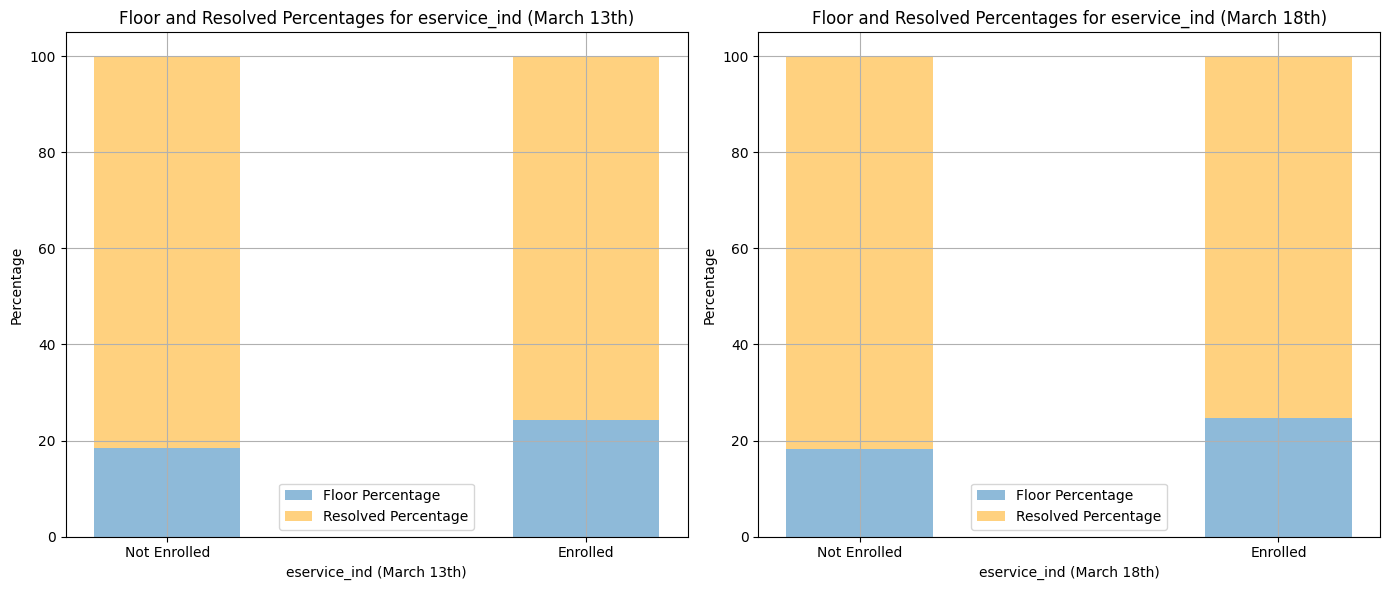

In [110]:
categories = ['Not Enrolled', 'Enrolled']
floor_percentages_13_march = [floor_percentage_13_march_0, floor_percentage_13_march_1]
floor_percentages_18_march = [floor_percentage_18_march_0, floor_percentage_18_march_1]

# Corresponding resolved percentages for March 13th and March 18th
resolved_percentages_13_march = [100 - perc for perc in floor_percentages_13_march]
resolved_percentages_18_march = [100 - perc for perc in floor_percentages_18_march]

# Width of the bars
bar_width = 0.35

# Positions for the bars
positions = np.arange(len(categories))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotting for March 13th
axs[0].bar(positions, floor_percentages_13_march, bar_width, alpha=0.5, label='Floor Percentage')
axs[0].bar(positions, resolved_percentages_13_march, bar_width, color='orange', alpha=0.5, label='Resolved Percentage', bottom=floor_percentages_13_march)
axs[0].set_xlabel('eservice_ind (March 13th)')
axs[0].set_ylabel('Percentage')
axs[0].set_title('Floor and Resolved Percentages for eservice_ind (March 13th)')
axs[0].set_xticks(positions)
axs[0].set_xticklabels(categories)
axs[0].legend()
axs[0].grid(True)

# Plotting for March 18th
axs[1].bar(positions, floor_percentages_18_march, bar_width, alpha=0.5, label='Floor Percentage')
axs[1].bar(positions, resolved_percentages_18_march, bar_width, color='orange', alpha=0.5, label='Resolved Percentage', bottom=floor_percentages_18_march)
axs[1].set_xlabel('eservice_ind (March 18th)')
axs[1].set_ylabel('Percentage')
axs[1].set_title('Floor and Resolved Percentages for eservice_ind (March 18th)')
axs[1].set_xticks(positions)
axs[1].set_xticklabels(categories)
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()




Looking at transitions

In [85]:
# Count the number of cases where auto-pay status changed from 0 to 1 from March 13th to March 18th
changed_to_1 = ((df['eservice_ind_13_march'] == 0) & (df['eservice_ind_18_march'] == 1))

# Count the number of cases where auto-pay status changed from 1 to 0 from March 13th to March 18th
changed_to_0 = ((df['eservice_ind_13_march'] == 1) & (df['eservice_ind_18_march'] == 0))

# Count the number of cases where auto-pay status stayed the same from March 13th to March 18th
stayed_same = ((df['eservice_ind_13_march'] == df['eservice_ind_18_march']))

In [86]:
# Calculate the total number of cases for each category
total_changed_to_1 = len(df[changed_to_1])
total_changed_to_0 = len(df[changed_to_0])
total_stayed_same = len(df[stayed_same])

# Calculate the total number of resolved cases for each category
resolved_changed_to_1 = len(df[(changed_to_1) & (df['resolved'] == 'resolved')])
resolved_changed_to_0 = len(df[(changed_to_0) & (df['resolved'] == 'resolved')])
resolved_stayed_same = len(df[(stayed_same) & (df['resolved'] == 'resolved')])

# Calculate the total number of floor cases for each category
floor_changed_to_1 = len(df[(changed_to_1) & (df['resolved'] == 'floor')])
floor_changed_to_0 = len(df[(changed_to_0) & (df['resolved'] == 'floor')])
floor_stayed_same = len(df[(stayed_same) & (df['resolved'] == 'floor')])

# Calculate the percentage of resolved and floor cases for each category
resolved_changed_to_1_percentage = (resolved_changed_to_1 / total_changed_to_1) * 100
resolved_changed_to_0_percentage = (resolved_changed_to_0 / total_changed_to_0) * 100
resolved_stayed_same_percentage = (resolved_stayed_same / total_stayed_same) * 100
floor_changed_to_1_percentage = (floor_changed_to_1 / total_changed_to_1) * 100
floor_changed_to_0_percentage = (floor_changed_to_0 / total_changed_to_0) * 100
floor_stayed_same_percentage = (floor_stayed_same / total_stayed_same) * 100

# Print the total number of cases for each category
print("Total number of cases where auto-pay status changed from 0 to 1:", total_changed_to_1)
print("Total number of cases where auto-pay status changed from 1 to 0:", total_changed_to_0)
print("Total number of cases where auto-pay status stayed the same:", total_stayed_same)
print()

# Print the total number of resolved cases for each category
print("Total number of resolved cases where auto-pay status changed from 0 to 1:", resolved_changed_to_1)
print("Total number of resolved cases where auto-pay status changed from 1 to 0:", resolved_changed_to_0)
print("Total number of resolved cases where auto-pay status stayed the same:", resolved_stayed_same)
print()

# Print the total number of floor cases for each category
print("Total number of floor cases where auto-pay status changed from 0 to 1:", floor_changed_to_1)
print("Total number of floor cases where auto-pay status changed from 1 to 0:", floor_changed_to_0)
print("Total number of floor cases where auto-pay status stayed the same:", floor_stayed_same)
print()

# Print the percentage of resolved and floor cases for each category
print("Percentage of resolved cases for auto-pay status changed from 0 to 1:", resolved_changed_to_1_percentage)
print("Percentage of resolved cases for auto-pay status changed from 1 to 0:", resolved_changed_to_0_percentage)
print("Percentage of resolved cases for auto-pay status stayed the same:", resolved_stayed_same_percentage)
print("Percentage of floor cases for auto-pay status changed from 0 to 1:", floor_changed_to_1_percentage)
print("Percentage of floor cases for auto-pay status changed from 1 to 0:", floor_changed_to_0_percentage)
print("Percentage of floor cases for auto-pay status stayed the same:", floor_stayed_same_percentage)


Total number of cases where auto-pay status changed from 0 to 1: 8005
Total number of cases where auto-pay status changed from 1 to 0: 32
Total number of cases where auto-pay status stayed the same: 1790761

Total number of resolved cases where auto-pay status changed from 0 to 1: 3841
Total number of resolved cases where auto-pay status changed from 1 to 0: 24
Total number of resolved cases where auto-pay status stayed the same: 1428716

Total number of floor cases where auto-pay status changed from 0 to 1: 4164
Total number of floor cases where auto-pay status changed from 1 to 0: 8
Total number of floor cases where auto-pay status stayed the same: 362045

Percentage of resolved cases for auto-pay status changed from 0 to 1: 47.98251093066833
Percentage of resolved cases for auto-pay status changed from 1 to 0: 75.0
Percentage of resolved cases for auto-pay status stayed the same: 79.78261755756351
Percentage of floor cases for auto-pay status changed from 0 to 1: 52.01748906933167
P

### Section 2.7: Card Activation Status

We look into the reasons where Card Activation status could impact the floor/ resolved column or any other inference. Here, the code denotes
* 0	- activated
* 1 - (blank -> changed to 1) implies card does not need to be activated
* 7	- SYF sent customer a new plastic with a new account number and it has not been activated yet.
* 8 - SYF sent customer a new plastic with the same account number as their old plastic and it has not been activated yet.

In [112]:
floor_count_13_march_0 = (df[df['card_activation_status_13_march'] == '0']['resolved'] == 'floor').sum()
floor_count_13_march_1 = (df[df['card_activation_status_13_march'] == '1']['resolved'] == 'floor').sum()
floor_count_13_march_7 = (df[df['card_activation_status_13_march'] == '7']['resolved'] == 'floor').sum()
floor_count_13_march_8 = (df[df['card_activation_status_13_march'] == '8']['resolved'] == 'floor').sum()

total_cases_13_march_0 = (df['card_activation_status_13_march'] == '0').sum()
total_cases_13_march_1 = (df['card_activation_status_13_march'] == '1').sum()
total_cases_13_march_7 = (df['card_activation_status_13_march'] == '7').sum()
total_cases_13_march_8 = (df['card_activation_status_13_march'] == '8').sum()

floor_percentage_13_march_0 = (floor_count_13_march_0 / total_cases_13_march_0) * 100
floor_percentage_13_march_1 = (floor_count_13_march_1 / total_cases_13_march_1) * 100
floor_percentage_13_march_7 = (floor_count_13_march_7 / total_cases_13_march_7) * 100
floor_percentage_13_march_8 = (floor_count_13_march_8 / total_cases_13_march_8) * 100

print("Total cases for 'card_activation_status_13_march' being 0 on March 13th:", total_cases_13_march_0)
print("Total cases for 'card_activation_status_13_march' being 1 on March 13th:", total_cases_13_march_1)
print("Total cases for 'card_activation_status_13_march' being 7 on March 13th:", total_cases_13_march_7)
print("Total cases for 'card_activation_status_13_march' being 8 on March 13th:", total_cases_13_march_8)

print("Floor percentage for 'card_activation_status_13_march' being 0 on March 13th:", floor_percentage_13_march_0)
print("Floor percentage for 'card_activation_status_13_march' being 1 on March 13th:", floor_percentage_13_march_1)
print("Floor percentage for 'card_activation_status_13_march' being 7 on March 13th:", floor_percentage_13_march_7)
print("Floor percentage for 'card_activation_status_13_march' being 8 on March 13th:", floor_percentage_13_march_8)

floor_count_18_march_0 = (df[df['card_activation_status_18_march'] == '0']['resolved'] == 'floor').sum()
floor_count_18_march_1 = (df[df['card_activation_status_18_march'] == '1']['resolved'] == 'floor').sum()
floor_count_18_march_7 = (df[df['card_activation_status_18_march'] == '7']['resolved'] == 'floor').sum()
floor_count_18_march_8 = (df[df['card_activation_status_18_march'] == '8']['resolved'] == 'floor').sum()

total_cases_18_march_0 = (df['card_activation_status_18_march'] == '0').sum()
total_cases_18_march_1 = (df['card_activation_status_18_march'] == '1').sum()
total_cases_18_march_7 = (df['card_activation_status_18_march'] == '7').sum()
total_cases_18_march_8 = (df['card_activation_status_18_march'] == '8').sum()

floor_percentage_18_march_0 = (floor_count_18_march_0 / total_cases_18_march_0) * 100
floor_percentage_18_march_1 = (floor_count_18_march_1 / total_cases_18_march_1) * 100
floor_percentage_18_march_7 = (floor_count_18_march_7 / total_cases_18_march_7) * 100
floor_percentage_18_march_8 = (floor_count_18_march_8 / total_cases_18_march_8) * 100

print("Total cases for 'card_activation_status_18_march' being 0 on March 18th:", total_cases_18_march_0)
print("Total cases for 'card_activation_status_18_march' being 1 on March 18th:", total_cases_18_march_1)
print("Total cases for 'card_activation_status_18_march' being 7 on March 18th:", total_cases_18_march_7)
print("Total cases for 'card_activation_status_18_march' being 8 on March 18th:", total_cases_18_march_8)

print("Floor percentage for 'card_activation_status_18_march' being 0 on March 18th:", floor_percentage_18_march_0)
print("Floor percentage for 'card_activation_status_18_march' being 1 on March 18th:", floor_percentage_18_march_1)
print("Floor percentage for 'card_activation_status_18_march' being 7 on March 18th:", floor_percentage_18_march_7)
print("Floor percentage for 'card_activation_status_18_march' being 8 on March 18th:", floor_percentage_18_march_8)


Total cases for 'card_activation_status_13_march' being 0 on March 13th: 1646276
Total cases for 'card_activation_status_13_march' being 1 on March 13th: 25274
Total cases for 'card_activation_status_13_march' being 7 on March 13th: 59622
Total cases for 'card_activation_status_13_march' being 8 on March 13th: 67626
Floor percentage for 'card_activation_status_13_march' being 0 on March 13th: 19.636500805454247
Floor percentage for 'card_activation_status_13_march' being 1 on March 13th: 22.410382210967793
Floor percentage for 'card_activation_status_13_march' being 7 on March 13th: 32.79326423132401
Floor percentage for 'card_activation_status_13_march' being 8 on March 13th: 26.21772690976843
Total cases for 'card_activation_status_18_march' being 0 on March 18th: 1637111
Total cases for 'card_activation_status_18_march' being 1 on March 18th: 24993
Total cases for 'card_activation_status_18_march' being 7 on March 18th: 54651
Total cases for 'card_activation_status_18_march' being 8

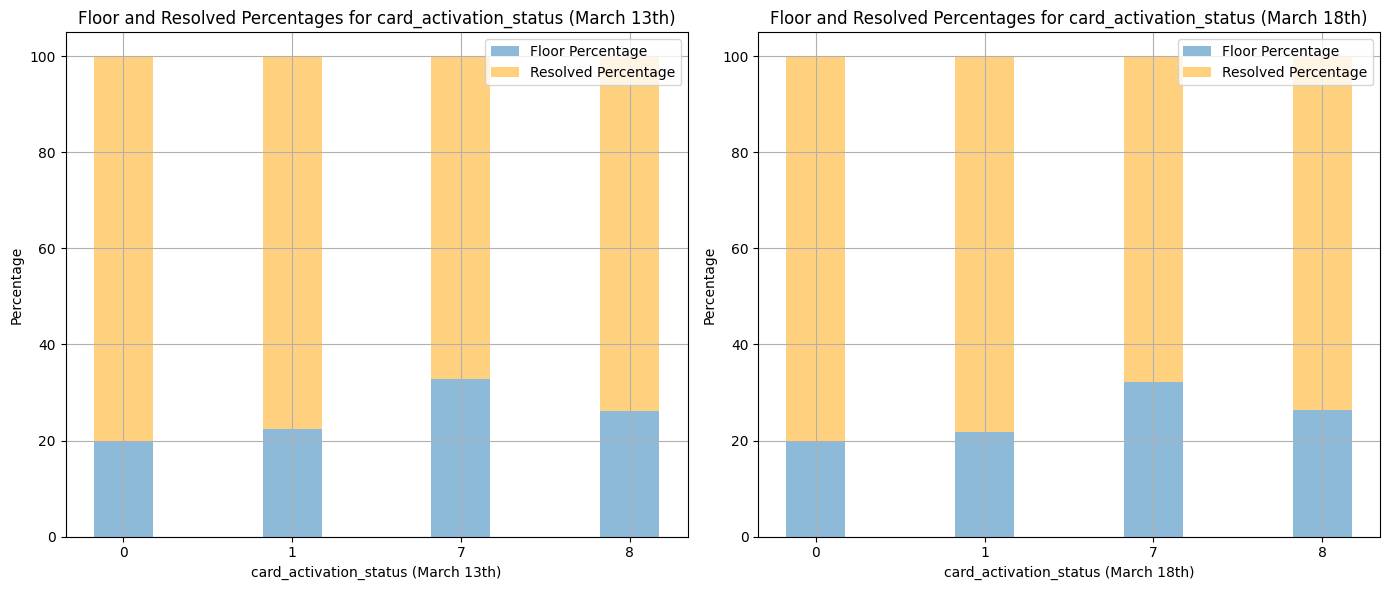

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Categories
categories = ['0', '1', '7', '8']

# Floor percentages for March 13th and March 18th
floor_percentages_13_march = [floor_percentage_13_march_0, floor_percentage_13_march_1, floor_percentage_13_march_7, floor_percentage_13_march_8]
floor_percentages_18_march = [floor_percentage_18_march_0, floor_percentage_18_march_1, floor_percentage_18_march_7, floor_percentage_18_march_8]

# Corresponding resolved percentages
resolved_percentages_13_march = [100 - perc for perc in floor_percentages_13_march]
resolved_percentages_18_march = [100 - perc for perc in floor_percentages_18_march]

# Width of the bars
bar_width = 0.35

# Positions for the bars
positions = np.arange(len(categories))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotting for March 13th
axs[0].bar(positions, floor_percentages_13_march, bar_width, alpha=0.5, label='Floor Percentage')
axs[0].bar(positions, resolved_percentages_13_march, bar_width, color='orange', alpha=0.5, label='Resolved Percentage', bottom=floor_percentages_13_march)
axs[0].set_xlabel('card_activation_status (March 13th)')
axs[0].set_ylabel('Percentage')
axs[0].set_title('Floor and Resolved Percentages for card_activation_status (March 13th)')
axs[0].set_xticks(positions)
axs[0].set_xticklabels(categories)
axs[0].legend(loc='upper right')
axs[0].grid(True)

# Plotting for March 18th
axs[1].bar(positions, floor_percentages_18_march, bar_width, alpha=0.5, label='Floor Percentage')
axs[1].bar(positions, resolved_percentages_18_march, bar_width, color='orange', alpha=0.5, label='Resolved Percentage', bottom=floor_percentages_18_march)
axs[1].set_xlabel('card_activation_status (March 18th)')
axs[1].set_ylabel('Percentage')
axs[1].set_title('Floor and Resolved Percentages for card_activation_status (March 18th)')
axs[1].set_xticks(positions)
axs[1].set_xticklabels(categories)
axs[1].legend(loc='upper right')
axs[1].grid(True)

plt.tight_layout()
plt.show()


### Section 2.8: Account Status

We look into the reasons where Card Activation status could impact the floor/ resolved column or any other inference. Here, the code denotes
* A-Authorization prohibited
* B-Bankrupt
* C-Closed
* L-Lost
* U-Stolen
* N-Normal

In [116]:
floor_count_13_march_A = (df[df['account_status_13_march'] == 'A']['resolved'] == 'floor').sum()
floor_count_13_march_B = (df[df['account_status_13_march'] == 'B']['resolved'] == 'floor').sum()
floor_count_13_march_C = (df[df['account_status_13_march'] == 'C']['resolved'] == 'floor').sum()
floor_count_13_march_L = (df[df['account_status_13_march'] == 'L']['resolved'] == 'floor').sum()
floor_count_13_march_U = (df[df['account_status_13_march'] == 'U']['resolved'] == 'floor').sum()
floor_count_13_march_N = (df[df['account_status_13_march'] == 'N']['resolved'] == 'floor').sum()

total_cases_13_march_A = (df['account_status_13_march'] == 'A').sum()
total_cases_13_march_B = (df['account_status_13_march'] == 'B').sum()
total_cases_13_march_C = (df['account_status_13_march'] == 'C').sum()
total_cases_13_march_L = (df['account_status_13_march'] == 'L').sum()
total_cases_13_march_U = (df['account_status_13_march'] == 'U').sum()
total_cases_13_march_N = (df['account_status_13_march'] == 'N').sum()

floor_percentage_13_march_A = (floor_count_13_march_A / total_cases_13_march_A) * 100
floor_percentage_13_march_B = (floor_count_13_march_B / total_cases_13_march_B) * 100
floor_percentage_13_march_C = (floor_count_13_march_C / total_cases_13_march_C) * 100
floor_percentage_13_march_L = (floor_count_13_march_L / total_cases_13_march_L) * 100
floor_percentage_13_march_U = (floor_count_13_march_U / total_cases_13_march_U) * 100
floor_percentage_13_march_N = (floor_count_13_march_N / total_cases_13_march_N) * 100

print("Total cases for 'account_status' being A on March 13th:", total_cases_13_march_A)
print("Total cases for 'account_status' being B on March 13th:", total_cases_13_march_B)
print("Total cases for 'account_status' being C on March 13th:", total_cases_13_march_C)
print("Total cases for 'account_status' being L on March 13th:", total_cases_13_march_L)
print("Total cases for 'account_status' being U on March 13th:", total_cases_13_march_U)
print("Total cases for 'account_status' being N on March 13th:", total_cases_13_march_N)

print("Floor percentage for 'account_status' being A on March 13th:", floor_percentage_13_march_A)
print("Floor percentage for 'account_status' being B on March 13th:", floor_percentage_13_march_B)
print("Floor percentage for 'account_status' being C on March 13th:", floor_percentage_13_march_C)
print("Floor percentage for 'account_status' being L on March 13th:", floor_percentage_13_march_L)
print("Floor percentage for 'account_status' being U on March 13th:", floor_percentage_13_march_U)
print("Floor percentage for 'account_status' being N on March 13th:", floor_percentage_13_march_N)

floor_count_18_march_A = (df[df['account_status_18_march'] == 'A']['resolved'] == 'floor').sum()
floor_count_18_march_B = (df[df['account_status_18_march'] == 'B']['resolved'] == 'floor').sum()
floor_count_18_march_C = (df[df['account_status_18_march'] == 'C']['resolved'] == 'floor').sum()
floor_count_18_march_L = (df[df['account_status_18_march'] == 'L']['resolved'] == 'floor').sum()
floor_count_18_march_U = (df[df['account_status_18_march'] == 'U']['resolved'] == 'floor').sum()
floor_count_18_march_N = (df[df['account_status_18_march'] == 'N']['resolved'] == 'floor').sum()

total_cases_18_march_A = (df['account_status_18_march'] == 'A').sum()
total_cases_18_march_B = (df['account_status_18_march'] == 'B').sum()
total_cases_18_march_C = (df['account_status_18_march'] == 'C').sum()
total_cases_18_march_L = (df['account_status_18_march'] == 'L').sum()
total_cases_18_march_U = (df['account_status_18_march'] == 'U').sum()
total_cases_18_march_N = (df['account_status_18_march'] == 'N').sum()

floor_percentage_18_march_A = (floor_count_18_march_A / total_cases_18_march_A) * 100
floor_percentage_18_march_B = (floor_count_18_march_B / total_cases_18_march_B) * 100
floor_percentage_18_march_C = (floor_count_18_march_C / total_cases_18_march_C) * 100
floor_percentage_18_march_L = (floor_count_18_march_L / total_cases_18_march_L) * 100
floor_percentage_18_march_U = (floor_count_18_march_U / total_cases_18_march_U) * 100
floor_percentage_18_march_N = (floor_count_18_march_N / total_cases_18_march_N) * 100

print("Total cases for 'account_status' being A on March 18th:", total_cases_18_march_A)
print("Total cases for 'account_status' being B on March 18th:", total_cases_18_march_B)
print("Total cases for 'account_status' being C on March 18th:", total_cases_18_march_C)
print("Total cases for 'account_status' being L on March 18th:", total_cases_18_march_L)
print("Total cases for 'account_status' being U on March 18th:", total_cases_18_march_U)
print("Total cases for 'account_status' being N on March 18th:", total_cases_18_march_N)

print("Floor percentage for 'account_status' being A on March 18th:", floor_percentage_18_march_A)
print("Floor percentage for 'account_status' being B on March 18th:", floor_percentage_18_march_B)
print("Floor percentage for 'account_status' being C on March 18th:", floor_percentage_18_march_C)
print("Floor percentage for 'account_status' being L on March 18th:", floor_percentage_18_march_L)
print("Floor percentage for 'account_status' being U on March 18th:", floor_percentage_18_march_U)
print("Floor percentage for 'account_status' being U on March 18th:", floor_percentage_18_march_N)


Total cases for 'account_status' being A on March 13th: 6182
Total cases for 'account_status' being B on March 13th: 46
Total cases for 'account_status' being C on March 13th: 58006
Total cases for 'account_status' being L on March 13th: 1430
Total cases for 'account_status' being U on March 13th: 366
Total cases for 'account_status' being N on March 13th: 1732768
Floor percentage for 'account_status' being A on March 13th: 81.86670980265286
Floor percentage for 'account_status' being B on March 13th: 91.30434782608695
Floor percentage for 'account_status' being C on March 13th: 36.61000586146261
Floor percentage for 'account_status' being L on March 13th: 47.76223776223777
Floor percentage for 'account_status' being U on March 13th: 53.825136612021865
Floor percentage for 'account_status' being N on March 13th: 19.56395778315389
Total cases for 'account_status' being A on March 18th: 7857
Total cases for 'account_status' being B on March 18th: 61
Total cases for 'account_status' being

### Section 2.9: Account Balance

We look into the reasons where Account Balance status could impact the floor/ resolved column or any other inference. Here, the code 


In [117]:
filtered_df = df[(df["account_balance_13_march"] > 0) & (df["account_balance_18_march"] < 0)]

resolved_counts = filtered_df["resolved"].value_counts()

# Extract counts for "resolved" and "floor"
count_resolved = resolved_counts.get("resolved", 0)  # Default to 0 if "resolved" is not found
count_floor = resolved_counts.get("floor", 0)  # Default to 0 if "floor" is not found
print(f"Percentage of 'resolved': {count_resolved * 100/ (count_resolved+count_floor)}%")
print(f"Percentage of 'floor': {count_floor * 100/ (count_resolved+count_floor)}%")
print(f"total count: {count_resolved+count_floor}")

# Observation: out of total dataset, floored call is around 20%. but with 13Balance >0 & 18Balance < 0, then floor shoots to 42.5%

Percentage of 'resolved': 57.470010905125406%
Percentage of 'floor': 42.529989094874594%
total count: 1834


In [118]:

df_change_account_stat = df[df['account_status_13_march'] != df['account_status_18_march']]
resolved_counts_account = df_change_account_stat['resolved'].value_counts()
print(f"resolved_counts_account = {resolved_counts_account}")
df_change_ebill_stat = df[df['ebill_enrolled_status_13_march'] != df['ebill_enrolled_status_18_march']]
resolved_counts_ebill = df_change_ebill_stat['resolved'].value_counts()
print(f"resolved_counts_ebil = {resolved_counts_ebill}")
df_change_activation = df[df['card_activation_status_13_march'] != df['card_activation_status_18_march']]
resolved_counts_activation = df_change_activation['resolved'].value_counts()
print(f"resolved_counts_activation = {resolved_counts_activation}")


# this is to see usually account status changed from what to what
# filtering to floored people only
df_change_account_stat = df_change_account_stat[df_change_account_stat['resolved'] == 'floor']
# Create a new column to encode the value change
df_change_account_stat['change'] = df_change_account_stat['account_status_13_march'] + ' to ' + df_change_account_stat['account_status_18_march']
# Count the number of occurrences of each change
change_counts_account = df_change_account_stat['change'].value_counts()
# Calculate the total number of occurrences
total_occurrences_account = change_counts_account.sum()
# Calculate the percentages
change_percentages_account = (change_counts_account/ total_occurrences_account) * 100
# Displaying the counts
print(change_percentages_account)


# filtering to floored people only
df_change_ebill_stat = df_change_ebill_stat[df_change_ebill_stat['resolved'] == 'floor']
# Create a new column to encode the value change
df_change_ebill_stat['change'] = df_change_ebill_stat['ebill_enrolled_status_13_march'] + ' to ' + df_change_ebill_stat['ebill_enrolled_status_18_march']
# Count the number of occurrences of each change
change_counts_ebill = df_change_ebill_stat['change'].value_counts()
# Calculate the total number of occurrences
total_occurrences_ebill = change_counts_ebill.sum()
# Calculate the percentages
change_percentages_ebill = (change_counts_ebill/ total_occurrences_ebill) * 100
# Displaying the counts
print(change_percentages_ebill)


# filtering to floored people only
df_change_activation = df_change_activation[df_change_activation['resolved'] == 'floor']
# Create a new column to encode the value change
df_change_activation['change'] = df_change_activation['card_activation_status_13_march'].astype(str) + ' to ' + df_change_activation['card_activation_status_18_march'].astype(str)
# Count the number of occurrences of each change
change_counts_activation = df_change_activation['change'].value_counts()
# Calculate the total number of occurrences
total_occurrences_activation = change_counts_activation.sum()
# Calculate the percentages
change_percentages_activation = (change_counts_activation/ total_occurrences_activation) * 100
# Displaying the counts
print(change_percentages_activation)

resolved_counts_account = resolved
floor       24182
resolved     9982
Name: count, dtype: int64
resolved_counts_ebil = resolved
resolved    10539
floor        9223
Name: count, dtype: int64
resolved_counts_activation = resolved
resolved    22680
floor       12850
Name: count, dtype: int64
change
N to L    50.028947
N to C    26.771979
N to A    14.233728
A to N     6.157473
A to L     1.840212
A to C     0.359772
L to U     0.165412
C to L     0.128195
C to N     0.090977
N to U     0.086841
N to B     0.070300
B to C     0.028947
C to U     0.016541
C to A     0.008271
C to B     0.008271
U to C     0.004135
Name: count, dtype: float64
change
N to B    31.497344
N to E    24.579855
B to E    22.563157
E to N    13.412122
E to B     4.911634
B to N     3.035889
Name: count, dtype: float64
change
0 to 8    38.443580
7 to 0    27.439689
0 to 7    12.972763
8 to 0    11.914397
0 to 1     3.081712
1 to 8     2.926070
1 to 0     1.968872
7 to 8     1.003891
8 to 1     0.225681
1 to 7     0

### Section 2.10: Reason based Analysis

Here, we look into the reasons where the floor percentage is high but weighted based on the number of occurences of the reason as well

In [68]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'df' is your DataFrame with 'reason' and 'resolved' columns

# Create a contingency table
contingency_table = pd.crosstab(df['reason'], df['resolved'])

# Perform the chi-squared test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-squared:", chi2)
print("P-value:", p)


Chi-squared: 511699.3808419985
P-value: 0.0


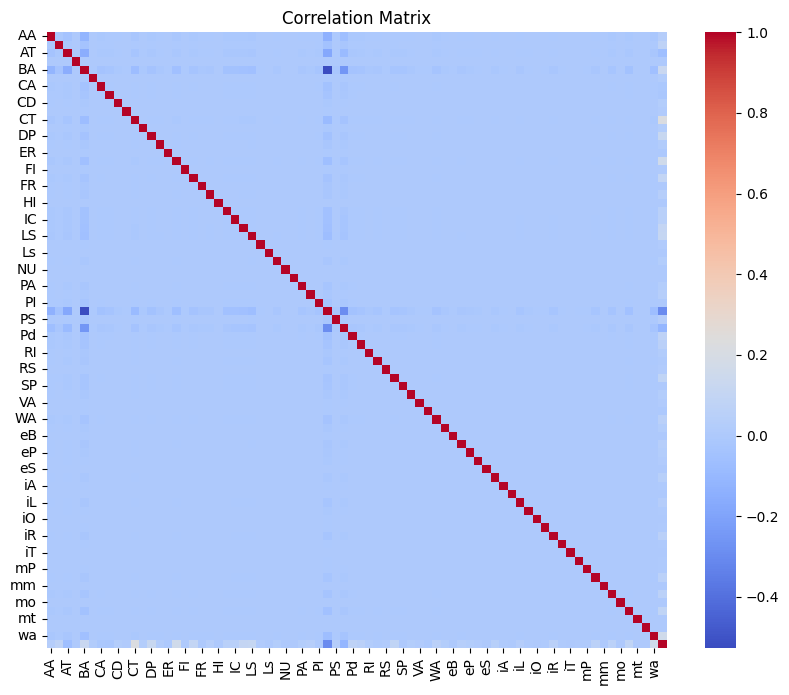

In [69]:

# Create dummy variables for each unique reason
reason_dummies = pd.get_dummies(df['reason'])

# Convert 'resolved' column to binary (0 and 1)
df['resolved_binary'] = df['resolved'].map({'resolved': 0, 'floor': 1})

# Concatenate reason dummies with the binary 'resolved' column
data_combined = pd.concat([reason_dummies, df['resolved_binary']], axis=1)

# Compute the correlation matrix
correlation_matrix = data_combined.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [70]:
# Create a set of unique reasons
unique_reasons = set(df['reason'])

# Dictionary to store floor percentages and total occurrences for each reason
reason_statistics = {}

# Calculate floor percentages and total occurrences for each reason
for reason in unique_reasons:
    reason_df = df[df['reason'] == reason]
    total_cases = len(reason_df)
    floor_count = (reason_df['resolved'] == 'floor').sum()
    floor_percentage = (floor_count / total_cases) * 100
    weighted_percentage = (floor_count / total_cases) * 100 * (total_cases / len(df))
    reason_statistics[reason] = {'Floor Percentage': floor_percentage, 'Weighted Percentage': weighted_percentage, 'Total Cases': total_cases}
    
# Sort weighted percentages from highest to lowest
sorted_reason_statistics = sorted(reason_statistics.items(), key=lambda x: x[1]['Weighted Percentage'], reverse=True)

# Print sorted weighted percentages along with the total occurrences
for reason, stats in sorted_reason_statistics:
    print(f"Reason: {reason}, Weighted Percentage: {stats['Weighted Percentage']:.2f}%, Floor Percentage: {stats['Floor Percentage']:.2f}%, Total Cases: {stats['Total Cases']}")


Reason: BA, Weighted Percentage: 8.81%, Floor Percentage: 27.97%, Total Cases: 566351
Reason: PP, Weighted Percentage: 1.87%, Floor Percentage: 4.95%, Total Cases: 678314
Reason: CT, Weighted Percentage: 1.28%, Floor Percentage: 97.00%, Total Cases: 23796
Reason: PT, Weighted Percentage: 1.02%, Floor Percentage: 8.26%, Total Cases: 221583
Reason: AA, Weighted Percentage: 0.84%, Floor Percentage: 27.50%, Total Cases: 54861
Reason: wa, Weighted Percentage: 0.74%, Floor Percentage: 92.67%, Total Cases: 14296
Reason: FD, Weighted Percentage: 0.69%, Floor Percentage: 95.90%, Total Cases: 13007
Reason: LS, Weighted Percentage: 0.53%, Floor Percentage: 68.88%, Total Cases: 13765
Reason: AT, Weighted Percentage: 0.48%, Floor Percentage: 9.50%, Total Cases: 91404
Reason: LC, Weighted Percentage: 0.42%, Floor Percentage: 75.25%, Total Cases: 10076
Reason: DP, Weighted Percentage: 0.38%, Floor Percentage: 98.53%, Total Cases: 6930
Reason: mp, Weighted Percentage: 0.30%, Floor Percentage: 71.26%, 

Here, Since we know about BA and PP already, we will ignore those two, instead lets look at the following intresting ones with high floor percentages with a cut off of 0.5% atleast in weighted percentage: CT, FD, wa, LC, LS

### Section 2.11: Looking into Serial Callers

Here, in this section, we want to see if there are cases where a customer has called back multiple times. This can be done by cross checking with the serial column which has the account number. 

Serial callers are looked at on a daily basis. Thus, for the purposes of this project, we set the threshold that if a caller has called more than 4 times in one day, they will be classified as a serial caller. Here, we will do a day by day analysis overlooking March 13th since March 13th considers the time only from 11pm to 11:59pm whereas the rest of the days cover 24 hour data


In [224]:
df['timestamp'] = pd.to_datetime(df['date_of_call'] + ' ' + df['time_of_call'].astype(str))
min_max_times = df.groupby('date_of_call')['timestamp'].agg(['min', 'max'])
print(min_max_times)

                             min                 max
date_of_call                                        
03/13/2024   2024-03-13 23:55:39 2024-03-13 23:59:59
03/14/2024   2024-03-14 00:00:01 2024-03-14 23:59:59
03/15/2024   2024-03-15 00:00:00 2024-03-15 23:59:59
03/16/2024   2024-03-16 00:00:00 2024-03-16 23:59:59
03/17/2024   2024-03-17 00:00:00 2024-03-17 23:59:16


In [225]:
#Splitting the datafram based on the date
march_14_data = df[df['date_of_call'] == '03/14/2024']
print(len(march_14_data))
march_15_data = df[df['date_of_call'] == '03/15/2024']
print(len(march_15_data))
march_16_data = df[df['date_of_call'] == '03/16/2024']
print(len(march_16_data))
march_17_data = df[df['date_of_call'] == '03/17/2024']
print(len(march_17_data))

530100
579683
384879
303933


In [226]:
# Count the occurrences of each count
# Count occurrences of each serial
serial_counts = march_14_data['serial'].value_counts()
serialcaller = serial_counts[serial_counts > 1]
occurrence_counts_14 = serialcaller.value_counts().sort_index()
print("14 march")
print(occurrence_counts_14)

serial_counts = march_15_data['serial'].value_counts()
serialcaller = serial_counts[serial_counts > 1]
occurrence_counts_15 = serialcaller.value_counts().sort_index()
print("15 march")
print(occurrence_counts_15)

serial_counts = march_16_data['serial'].value_counts()
serialcaller = serial_counts[serial_counts > 1]
occurrence_counts_16 = serialcaller.value_counts().sort_index()
print("16 march")
print(occurrence_counts_16)

serial_counts = march_17_data['serial'].value_counts()
serialcaller = serial_counts[serial_counts > 1]
occurrence_counts_17 = serialcaller.value_counts().sort_index()
print("17 march")
print(occurrence_counts_17)

14 march
count
2     40674
3      5607
4      1131
5       284
6        78
7        35
8        18
9        13
10        2
11        1
12        2
24        1
Name: count, dtype: int64
15 march
count
2     44557
3      6236
4      1249
5       286
6        98
7        25
8        14
9         6
10        3
11        3
12        2
14        1
17        1
19        1
20        1
Name: count, dtype: int64
16 march
count
2     28761
3      3984
4       787
5       197
6        56
7        25
8         8
9         3
10        3
12        1
13        1
14        1
Name: count, dtype: int64
17 march
count
2     22253
3      2897
4       557
5       148
6        54
7        11
8         9
9         4
10        1
11        1
13        1
14        1
16        2
Name: count, dtype: int64


Here, we will now set the threshold as the serial_counts as more than 4 and then, assign a new column called serial_caller which has either 0 or 1 based on the number of occurences of the serial number

In [227]:
# Count the occurrences of each serial number for each day
serial_counts_14 = march_14_data['serial'].value_counts()
serial_counts_15 = march_15_data['serial'].value_counts()
serial_counts_16 = march_16_data['serial'].value_counts()
serial_counts_17 = march_17_data['serial'].value_counts()

# Assign a new column 'serial_caller' based on the 4
march_14_data['serial_caller'] = march_14_data['serial'].map(lambda x: 1 if serial_counts_14.get(x, 0) > 4 else 0)
march_15_data['serial_caller'] = march_15_data['serial'].map(lambda x: 1 if serial_counts_15.get(x, 0) > 4 else 0)
march_16_data['serial_caller'] = march_16_data['serial'].map(lambda x: 1 if serial_counts_16.get(x, 0) > 4 else 0)
march_17_data['serial_caller'] = march_17_data['serial'].map(lambda x: 1 if serial_counts_17.get(x, 0) > 4 else 0)

# Print the results
print("March 14th:")
print(march_14_data['serial_caller'].value_counts())

print("March 15th:")
print(march_15_data['serial_caller'].value_counts())

print("March 16th:")
print(march_16_data['serial_caller'].value_counts())

print("March 17th:")
print(march_17_data['serial_caller'].value_counts())

/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_30047/2353025293.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_14_data['serial_caller'] = march_14_data['serial'].map(lambda x: 1 if serial_counts_14.get(x, 0) > 4 else 0)
/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_30047/2353025293.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_15_data['serial_caller'] = march_15_data['serial'].map(lambda x: 1 if serial_counts_15.get(x, 0) > 4 else 0)
/var/folders/g9/5jyvjr4j7l

March 14th:
serial_caller
0    527627
1      2473
Name: count, dtype: int64
March 15th:
serial_caller
0    577167
1      2516
Name: count, dtype: int64
March 16th:
serial_caller
0    383223
1      1656
Name: count, dtype: int64
March 17th:
serial_caller
0    302604
1      1329
Name: count, dtype: int64


/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_30047/2353025293.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  march_17_data['serial_caller'] = march_17_data['serial'].map(lambda x: 1 if serial_counts_17.get(x, 0) > 4 else 0)


There are more number of calls on 14th and 15th march (Which is Thrusday and Friday). Completely unrelated fact but this was also the same day that the annual report dropped on 15th which was the synchrony financial report. Intresting fact!

In [233]:
def calculate_serial_caller_percentage(df):
    total_cases = len(df)
    serial_caller_cases = df[df['serial_caller'] == 1]
    serial_caller_count = len(serial_caller_cases)
    percentage_serial_callers = (serial_caller_count / total_cases) * 100
    print(percentage_serial_callers)


calculate_serial_caller_percentage(march_14_data)
calculate_serial_caller_percentage(march_15_data)
calculate_serial_caller_percentage(march_16_data)
calculate_serial_caller_percentage(march_17_data)

print(march_14_data['serial_caller'].value_counts())

0.46651575174495374
0.43403032346989645
0.430265096302994
0.4372674240704366
serial_caller
0    527627
1      2473
Name: count, dtype: int64


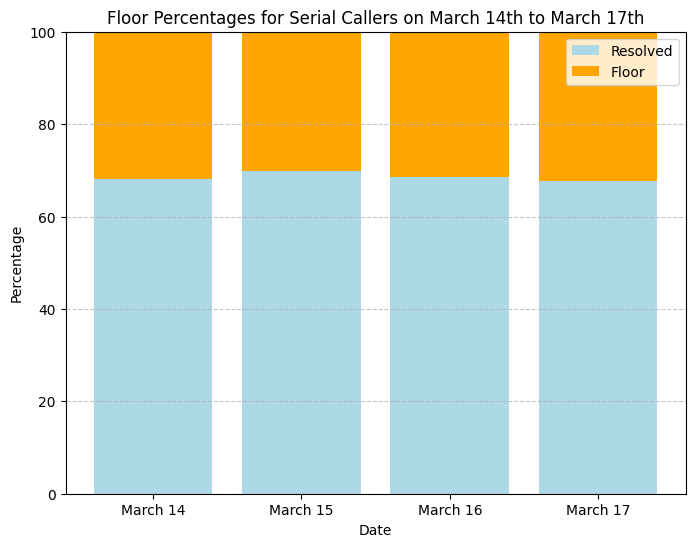

In [237]:
# Filter each day's data for serial callers
march_14_serial_data = march_14_data[march_14_data['serial_caller'] == 1]
march_15_serial_data = march_15_data[march_15_data['serial_caller'] == 1]
march_16_serial_data = march_16_data[march_16_data['serial_caller'] == 1]
march_17_serial_data = march_17_data[march_17_data['serial_caller'] == 1]

# Define a function to calculate floor percentages
def calculate_floor_percentage(data):
    total_calls = len(data)
    floor_calls = data['resolved'].value_counts().get('floor', 0)
    return (floor_calls / total_calls) * 100 if total_calls != 0 else 0

# Calculate floor percentages for each day
march_14_floor_percentage = calculate_floor_percentage(march_14_serial_data)
march_15_floor_percentage = calculate_floor_percentage(march_15_serial_data)
march_16_floor_percentage = calculate_floor_percentage(march_16_serial_data)
march_17_floor_percentage = calculate_floor_percentage(march_17_serial_data)

# Plotting
dates = ['March 14', 'March 15', 'March 16', 'March 17']
resolved_percentages = [100 - march_14_floor_percentage, 100 - march_15_floor_percentage, 100 - march_16_floor_percentage, 100 - march_17_floor_percentage]
floor_percentages = [march_14_floor_percentage, march_15_floor_percentage, march_16_floor_percentage, march_17_floor_percentage]

plt.figure(figsize=(8, 6))
plt.bar(dates, resolved_percentages, color='lightblue', label='Resolved')
plt.bar(dates, floor_percentages, bottom=resolved_percentages, color='orange', label='Floor')
plt.title('Floor Percentages for Serial Callers on March 14th to March 17th')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Limit y-axis to 0-100
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


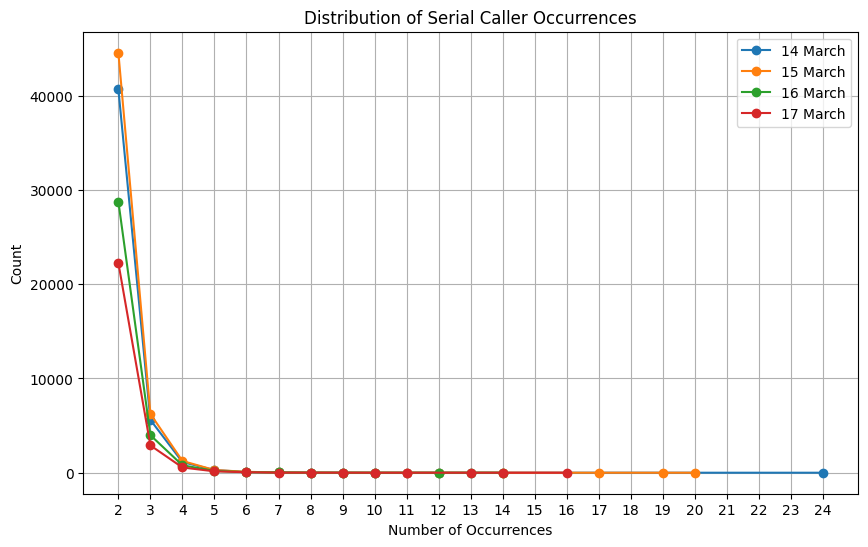

In [76]:
days = ['14 March', '15 March', '16 March', '17 March']
occurrences = [occurrence_counts_14, occurrence_counts_15, occurrence_counts_16, occurrence_counts_17]

plt.figure(figsize=(10, 6))
for day, counts in zip(days, occurrences):
    plt.plot(counts.index, counts.values, marker='o', linestyle='-', label=day)

plt.title('Distribution of Serial Caller Occurrences')
plt.xlabel('Number of Occurrences')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(range(2, max(occurrence_counts_14.index.max(), 
                        occurrence_counts_15.index.max(), 
                        occurrence_counts_16.index.max(), 
                        occurrence_counts_17.index.max()) + 1))
plt.show()

### Section 2.12: Looking into Delinquency

In [77]:
#counts of the delinquency_history for data wrt 13th March
df['delinquency_history_13_march'].value_counts()

delinquency_history_13_march
[00]    1660525
[20]      63358
[02]      54237
[22]       6014
[32]       4585
[03]       3590
[43]       1481
[54]        743
[88]        674
[04]        673
[23]        576
[65]        386
[76]        376
[08]        260
[33]        257
[05]        201
[44]        149
[06]        124
[55]         80
[07]         80
[34]         61
[87]         54
[24]         48
[77]         36
[66]         35
[45]         30
[56]         26
[67]         23
[46]         17
[35]         16
[25]         14
[47]         11
[26]         10
[36]         10
[78]          9
[30]          6
[68]          5
[27]          4
[57]          4
[48]          3
[37]          3
[58]          1
[40]          1
[53]          1
[42]          1
Name: count, dtype: int64

In [78]:
#counts of the delinquency_history for data wrt 18th March
df['delinquency_history_18_march'].value_counts()

delinquency_history_18_march
[00]    1659023
[20]      63311
[02]      56348
[22]       6032
[03]       3872
[32]       3839
[43]       1433
[04]        736
[54]        706
[88]        693
[23]        558
[65]        344
[76]        320
[08]        283
[05]        242
[33]        200
[06]        149
[44]        142
[07]         85
[55]         74
[24]         53
[34]         46
[87]         46
[56]         31
[66]         31
[45]         31
[77]         29
[67]         22
[25]         18
[46]         14
[78]         13
[35]         10
[47]         10
[48]          8
[30]          7
[57]          6
[68]          6
[27]          4
[58]          4
[26]          4
[38]          4
[37]          4
[36]          3
[40]          1
[53]          1
[80]          1
[42]          1
Name: count, dtype: int64

In [79]:
# Split the DataFrame into two parts
df_n1 = df.iloc[:, 3:15]  # Data wrt 13th March
df_n2 = pd.concat([df.iloc[:, 4:7], df.iloc[:, 17:]], axis=1)  #Data wrt 18th March

In [80]:
#13 March

#xcluding bad data wrt 13th March
exclude_values = ['[20]', '[24]', '[25]', '[46]', '[35]', '[47]', '[48]', '[57]', '[68]', '[27]', '[58]', '[26]', '[37]', '[36]', '[53]', '[42]', '[30]', '[40]']


# Filter out rows with specified values in the "delinquency_history_13_march_changed" column
df_filter1 = df_n1[~df_n1['delinquency_history_13_march'].isin(exclude_values)]

#Removing the sqaure brackets so that it can be further split into individual byte wrt 13th March

df_filter1['delinquency_history_13_march_changed'] = df_filter1['delinquency_history_13_march'].str.replace('[', '').str.replace(']', '')
df_filter1.head()

# Convert numeric column to string type 
df_filter1['delinquency_history_13_march_changed'] = df_filter1['delinquency_history_13_march_changed'].astype(str)

# Split numeric data into two parts
df_filter1['current'] = df_filter1['delinquency_history_13_march_changed'].str[:-1]
df_filter1['previous'] = df_filter1['delinquency_history_13_march_changed'].str[-1]


/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_18165/156003586.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter1['delinquency_history_13_march_changed'] = df_filter1['delinquency_history_13_march'].str.replace('[', '').str.replace(']', '')
/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_18165/156003586.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter1['delinquency_history_13_march_changed'] = df_filter1['delinquency_history_13_march_changed'].astype(str)
/v

In [81]:
#18 March

#Removing the sqaure brackets so that it can be further split into individual byte wrt 18th March

exclude_values = ['[20]', '[24]', '[25]', '[46]', '[35]', '[47]', '[48]', '[57]', '[68]', '[27]', '[58]', '[26]', '[38]', '[37]', '[36]', '[53]', '[42]', '[30]', '[80]']

# Filter out rows with specified values in the "delinquency_history_13_march_changed" column
df_filter2 = df_n2[~df_n2['delinquency_history_18_march'].isin(exclude_values)]

df_filter2['delinquency_history_18_march_changed'] = df_filter2['delinquency_history_18_march'].str.replace('[', '').str.replace(']', '')

# Convert numeric column to string type
df_filter2['delinquency_history_18_march_changed'] = df_filter2['delinquency_history_18_march_changed'].astype(str)

# Split numeric data into two parts
df_filter2['current18th'] = df_filter2['delinquency_history_18_march_changed'].str[:-1]
df_filter2['previous18th'] = df_filter2['delinquency_history_18_march_changed'].str[-1]

/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_18165/4220087027.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter2['delinquency_history_18_march_changed'] = df_filter2['delinquency_history_18_march'].str.replace('[', '').str.replace(']', '')
/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_18165/4220087027.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter2['delinquency_history_18_march_changed'] = df_filter2['delinquency_history_18_march_changed'].astype(str)


In [82]:
df_filter1['current'] = df_filter1['current'].astype(int)

#Grouping data to check the resolved and floor values in the current month wrt 13th March

grouped_data = df_filter1.groupby('resolved')['current'].sum() 
print(grouped_data)

#Grouping data to check the resolved and floor values in the previous month wrt 13th March

df_filter1['previous'] = df_filter1['previous'].astype(int) 


grouped_data1 = df_filter1.groupby('resolved')['previous'].sum()
print(grouped_data1)

#Grouping data to check the resolved and floor values in the previous month wrt 18th March

df_filter2['previous18th'] = df_filter2['previous18th'].astype(int) 


grouped_data1 = df_filter2.groupby('resolved')['previous18th'].sum()
print(grouped_data1)

#Grouping data to check the resolved and floor values in the current month wrt 18th March

df_filter2['current18th'] = df_filter2['current18th'].astype(int)


grouped_data2 = df_filter2.groupby('resolved')['current18th'].sum()
print(grouped_data2)

/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_18165/2106866124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter1['current'] = df_filter1['current'].astype(int)
/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_18165/2106866124.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter1['previous'] = df_filter1['previous'].astype(int)


resolved
floor       25273
resolved    24936
Name: current, dtype: int64
resolved
floor        47110
resolved    122524
Name: previous, dtype: int64
resolved
floor        47837
resolved    125137
Name: previous18th, dtype: int64
resolved
floor       23850
resolved    22896
Name: current18th, dtype: int64


/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_18165/2106866124.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter2['previous18th'] = df_filter2['previous18th'].astype(int)
/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_18165/2106866124.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter2['current18th'] = df_filter2['current18th'].astype(int)


The significant difference in the count of floor and resolved, leads to further explore the data

In [83]:
# Convert string values to numeric binary values
df_filter1['resolved_new'] = df_filter1['resolved'].map({'resolved': 1, 'floor': 0})
df_filter2['resolved_new'] = df_filter2['resolved'].map({'resolved': 1, 'floor': 0})

from scipy.stats import mannwhitneyu
# Separate data into two groups based on the binary column
group_0 = df_filter1[df_filter1['resolved_new'] == 0]['previous']
group_1 = df_filter1[df_filter1['resolved_new'] == 1]['previous']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_0, group_1)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_18165/2496600930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter1['resolved_new'] = df_filter1['resolved'].map({'resolved': 1, 'floor': 0})
/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_18165/2496600930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter2['resolved_new'] = df_filter2['resolved'].map({'resolved': 1, 'floor': 0})


Mann-Whitney U Test Results:
Test Statistic: 244603045959.0
P-value: 2.435240273723575e-83
Reject the null hypothesis: There is a significant difference between the distributions.


In [84]:
#We further check Cohen's coefficient to understand the magnitude

# Calculate Cohen's d
# Calculate the mean difference between the two groups
mean_diff = np.mean(group_0) - np.mean(group_1)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_0)**2 + np.std(group_1)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Cohen's d: 0.07953835774598869


In [85]:
# Separate data into two groups based on the binary column
group_2 = df_filter1[df_filter1['resolved_new'] == 0]['current']
group_3 = df_filter1[df_filter1['resolved_new'] == 1]['current']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_2, group_3)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

Mann-Whitney U Test Results:
Test Statistic: 245385634095.5
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the distributions.


In [86]:
# Calculate the mean difference between the two groups
mean_diff = np.mean(group_2) - np.mean(group_3)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_2)**2 + np.std(group_3)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Cohen's d: 0.11907803215789889


In [87]:
# Separate data into two groups based on the binary column
group_4 = df_filter2[df_filter2['resolved_new'] == 0]['previous18th']
group_5 = df_filter2[df_filter2['resolved_new'] == 1]['previous18th']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_4, group_5)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

Mann-Whitney U Test Results:
Test Statistic: 244033698620.5
P-value: 6.4036461709479316e-83
Reject the null hypothesis: There is a significant difference between the distributions.


In [88]:
# Calculate Cohen's d
# Calculate the mean difference between the two groups
mean_diff = np.mean(group_4) - np.mean(group_5)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_4)**2 + np.std(group_5)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Cohen's d: 0.0800440571202082


In [89]:
group_6 = df_filter2[df_filter2['resolved_new'] == 0]['current18th']
group_7 = df_filter2[df_filter2['resolved_new'] == 1]['current18th']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_6, group_7)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

Mann-Whitney U Test Results:
Test Statistic: 244647637944.0
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the distributions.


In [90]:
# Calculate the mean difference between the two groups
mean_diff = np.mean(group_6) - np.mean(group_7)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_6)**2 + np.std(group_7)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Cohen's d: 0.1168060306915869


In [91]:
#Checking wrt to Autopay
#Converting to binary

def int_to_binary(x):
    if x == 0:
        return 0
    else:
        return 1

# Apply the function to the integer column and create a new binary column
df_filter1['auto_pay_enrolled_status_13_march_bin'] = df_filter1['auto_pay_enrolled_status_13_march'].apply(lambda x: int_to_binary(x))
df_filter2['auto_pay_enrolled_status_18_march_bin'] = df_filter2['auto_pay_enrolled_status_18_march'].apply(lambda x: int_to_binary(x))

/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_18165/1432057053.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter1['auto_pay_enrolled_status_13_march_bin'] = df_filter1['auto_pay_enrolled_status_13_march'].apply(lambda x: int_to_binary(x))
/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_18165/1432057053.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter2['auto_pay_enrolled_status_18_march_bin'] = df_filter2['auto_pay_enrolled_status_18_march'].apply(lambda x: 

In [92]:
#Current month Wrt 13th March
from scipy.stats import mannwhitneyu


group_11 = df_filter1[df_filter1['auto_pay_enrolled_status_13_march_bin'] == 0]['current']
group_12 = df_filter1[df_filter1['auto_pay_enrolled_status_13_march_bin'] == 1]['current']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_11, group_12)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)


if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

mean_diff = np.mean(group_11) - np.mean(group_12)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_11)**2 + np.std(group_12)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Mann-Whitney U Test Results:
Test Statistic: 34125338019.0
P-value: 9.694604739120781e-32
Reject the null hypothesis: There is a significant difference between the distributions.
Cohen's d: 0.06355553379858625


In [93]:
#Previous month Wrt 13th March
# Assuming 'binary_column' is the binary column and 'numeric_column' is the numeric column
# 'df' is the DataFrame containing the columns

# Separate data into two groups based on the binary column
group_13 = df_filter1[df_filter1['auto_pay_enrolled_status_13_march_bin'] == 0]['previous']
group_14 = df_filter1[df_filter1['auto_pay_enrolled_status_13_march_bin'] == 1]['previous']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_13, group_14)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

mean_diff = np.mean(group_13) - np.mean(group_14)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_13)**2 + np.std(group_14)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Mann-Whitney U Test Results:
Test Statistic: 34692169930.0
P-value: 1.45345512863215e-104
Reject the null hypothesis: There is a significant difference between the distributions.
Cohen's d: 0.12105555644724386


In [94]:
#Previous month Wrt 18th March

# Separate data into two groups based on the binary column
group_15 = df_filter2[df_filter2['auto_pay_enrolled_status_18_march_bin'] == 0]['previous18th']
group_16 = df_filter2[df_filter2['auto_pay_enrolled_status_18_march_bin'] == 1]['previous18th']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_15, group_16)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

mean_diff = np.mean(group_15) - np.mean(group_16)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_15)**2 + np.std(group_16)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Mann-Whitney U Test Results:
Test Statistic: 34999462408.0
P-value: 4.509958400887555e-103
Reject the null hypothesis: There is a significant difference between the distributions.
Cohen's d: 0.12077507939640994


In [95]:
#Current month Wrt 18th March
# Separate data into two groups based on the binary column
group_17 = df_filter2[df_filter2['auto_pay_enrolled_status_18_march_bin'] == 0]['current18th']
group_18 = df_filter2[df_filter2['auto_pay_enrolled_status_18_march_bin'] == 1]['current18th']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_17, group_18)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

mean_diff = np.mean(group_17) - np.mean(group_18)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_17)**2 + np.std(group_18)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Mann-Whitney U Test Results:
Test Statistic: 34414274812.5
P-value: 2.9659192229682555e-29
Reject the null hypothesis: There is a significant difference between the distributions.
Cohen's d: 0.06091800252960797


In [96]:
#Checking wrt to Eservice
def int_to_binary(x):
    if x == 0:
        return 0
    else:
        return 1

# Apply the function to the integer column and create a new binary column
df_filter1['eservice_ind_13_march_bin'] = df_filter1['eservice_ind_13_march'].apply(lambda x: int_to_binary(x))
# Apply the function to the integer column and create a new binary column
df_filter2['eservice_ind_18_march_bin'] = df_filter2['eservice_ind_18_march'].apply(lambda x: int_to_binary(x))

/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_18165/4108283888.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter1['eservice_ind_13_march_bin'] = df_filter1['eservice_ind_13_march'].apply(lambda x: int_to_binary(x))
/var/folders/g9/5jyvjr4j7lv1y3yc8kjj9fr80000gn/T/ipykernel_18165/4108283888.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter2['eservice_ind_18_march_bin'] = df_filter2['eservice_ind_18_march'].apply(lambda x: int_to_binary(x))


In [97]:
#Previous month Wrt 13th March
group_20 = df_filter1[df_filter1['eservice_ind_13_march_bin'] == 0]['previous']
group_21 = df_filter1[df_filter1['eservice_ind_13_march_bin'] == 1]['previous']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_20, group_21)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

mean_diff = np.mean(group_20) - np.mean(group_21)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_20)**2 + np.std(group_21)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Mann-Whitney U Test Results:
Test Statistic: 330978973517.0
P-value: 4.2517744685674907e-17
Reject the null hypothesis: There is a significant difference between the distributions.
Cohen's d: -0.007665403493109948


In [98]:
#Current month Wrt 13th March

# Separate data into two groups based on the binary column
group_22 = df_filter1[df_filter1['eservice_ind_13_march_bin'] == 0]['current']
group_23 = df_filter1[df_filter1['eservice_ind_13_march_bin'] == 1]['current']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_22, group_23)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

mean_diff = np.mean(group_22) - np.mean(group_23)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_22)**2 + np.std(group_23)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Mann-Whitney U Test Results:
Test Statistic: 332299929015.0
P-value: 1.2772425228034071e-15
Reject the null hypothesis: There is a significant difference between the distributions.
Cohen's d: 0.014359116569013971


In [99]:
#Previous month Wrt 18th March

# Separate data into two groups based on the binary column
group_23 = df_filter2[df_filter2['eservice_ind_18_march_bin'] == 0]['previous18th']
group_24 = df_filter2[df_filter2['eservice_ind_18_march_bin'] == 1]['previous18th']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_23, group_24)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

# Calculate the mean difference between the two groups
mean_diff = np.mean(group_23) - np.mean(group_24)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_23)**2 + np.std(group_24)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Mann-Whitney U Test Results:
Test Statistic: 332940719067.5
P-value: 3.860372951332362e-27
Reject the null hypothesis: There is a significant difference between the distributions.
Cohen's d: -0.010517761539241527


In [100]:
#Current month Wrt 18th March
# Separate data into two groups based on the binary column
group_25 = df_filter2[df_filter2['eservice_ind_18_march_bin'] == 0]['current18th']
group_26 = df_filter2[df_filter2['eservice_ind_18_march_bin'] == 1]['current18th']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_25, group_26)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")

mean_diff = np.mean(group_25) - np.mean(group_26)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_25)**2 + np.std(group_26)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Mann-Whitney U Test Results:
Test Statistic: 334525582202.0
P-value: 1.1876092765564014e-15
Reject the null hypothesis: There is a significant difference between the distributions.
Cohen's d: 0.014804146777795294


In [101]:
#Current month Wrt 18th March
# Separate data into two groups based on the binary column
group_23 = df_filter2[df_filter2['eservice_ind_18_march_bin'] == 0]['previous18th']
group_24 = df_filter2[df_filter2['eservice_ind_18_march_bin'] == 1]['previous18th']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(group_23, group_24)

# Output the results
print("Mann-Whitney U Test Results:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the distributions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the distributions.")
    
mean_diff = np.mean(group_23) - np.mean(group_24)

# Calculate the pooled standard deviation
pooled_std = np.sqrt((np.std(group_23)**2 + np.std(group_24)**2) / 2)

# Calculate Cohen's d
cohen_d = mean_diff / pooled_std

print("Cohen's d:", cohen_d)

Mann-Whitney U Test Results:
Test Statistic: 332940719067.5
P-value: 3.860372951332362e-27
Reject the null hypothesis: There is a significant difference between the distributions.
Cohen's d: -0.010517761539241527


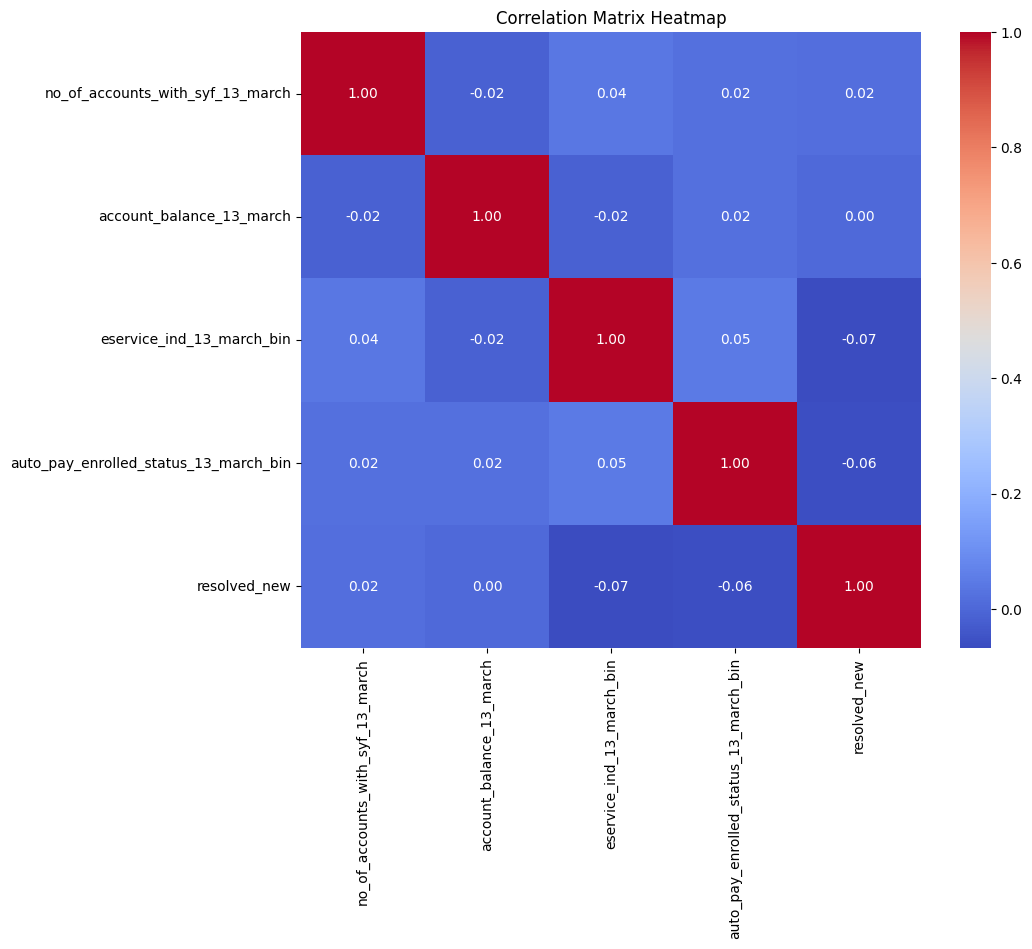

In [102]:
selected_columns = ['no_of_accounts_with_syf_13_march', 'account_balance_13_march',
                    'eservice_ind_13_march_bin','auto_pay_enrolled_status_13_march_bin','resolved_new']

# Compute the correlation matrix
corr_matrix = df_filter1[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## Section 3: Data Visualization

In [105]:
w_fp = 0.6 
w_to = 0.4

mos_sequences_df = df['mos'].str.split().apply(tuple).to_frame(name='mos_sequence_tuple').copy()
mos_sequences_df['resolved_status'] = df['resolved']

grouped_counts = mos_sequences_df.groupby(['mos_sequence_tuple', 'resolved_status']).size().unstack(fill_value=0)

grouped_counts['total_occurrences'] = grouped_counts['resolved'] + grouped_counts['floor']

grouped_counts['floor_percentage'] = (grouped_counts['floor'] / grouped_counts['total_occurrences']) * 100

sorted_grouped_counts = grouped_counts.sort_values(by='floor_percentage', ascending=False)

sorted_grouped_counts.reset_index(inplace=True)

sorted_grouped_counts['mos_sequence'] = sorted_grouped_counts['mos_sequence_tuple'].apply(lambda x: ' '.join(x))

mos_df = sorted_grouped_counts[['mos_sequence', 'floor_percentage', 'total_occurrences', 'resolved', 'floor']].copy()

mos_df.rename(columns={
    'mos_sequence': 'MOS Sequence',
    'floor_percentage': 'Floor Call Percentage',
    'total_occurrences': 'Total Occurrences',
    'resolved': 'Number of Resolved Calls',
    'floor': 'Number of Floor Calls'
}, inplace=True)

mos_df['weighted_score'] = (w_fp + w_to) / ((w_fp / (mos_df['Floor Call Percentage'] + 1)) + (w_to / (mos_df['Total Occurrences'] + 1)))

mos_df_sorted = mos_df.sort_values(by='weighted_score', ascending=False)

print(mos_df_sorted[['MOS Sequence', 'Floor Call Percentage', 'Total Occurrences', 'weighted_score']].head(20))


resolved_status             MOS Sequence  Floor Call Percentage  \
22516               IA BA TS nl mt RS TR              99.669754   
22497                  IA BA nl mt RS TR              99.768188   
22492               IA PP BA nl mt RS TR              99.798894   
22598                        IA BA nl TR              99.088624   
22512            IA PP BA TS nl mt RS TR              99.698417   
22513            IA PI BA TS nl mt RS TR              99.690482   
22676                     IA BA TS nl TR              98.465335   
22504            mn IA BA TS nl mt RS TR              99.727438   
22559            IA BA TS nl nl mt RS TR              99.375170   
22611                     mn IA BA nl TR              98.999090   
22683                  IA PI BA TS nl TR              98.429103   
22553                     IA PP BA nl TR              99.423839   
22505            IA BA TS mm mo mt RS TR              99.717057   
22484            IA IA BA TS nl mt RS TR              99.90800

In [106]:
!pip install networkx


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


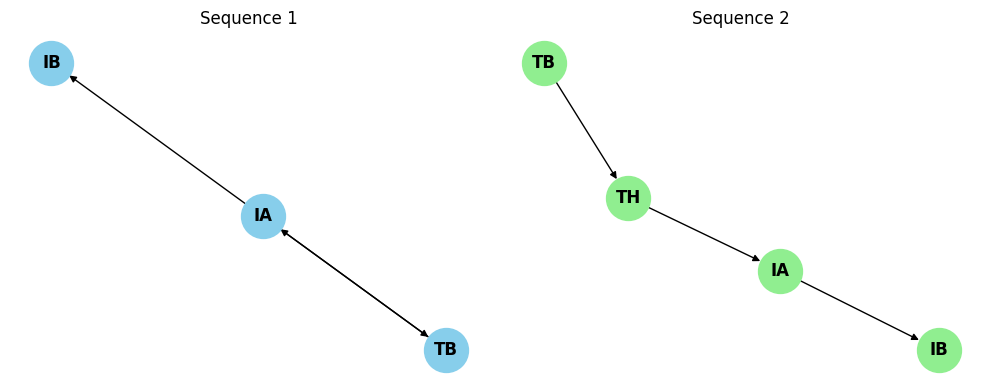

In [107]:
import networkx as nx
import matplotlib.pyplot as plt

# Define sequences
sequence1 = "IA TB IA IB"
sequence2 = "TB TH IA IB"

# Function to create directed graph from sequence
def create_sequence_graph(sequence):
    items = sequence.split()
    G = nx.DiGraph()
    for i in range(len(items) - 1):
        G.add_edge(items[i], items[i+1])
    return G

# Create directed graphs for sequences
G1 = create_sequence_graph(sequence1)
G2 = create_sequence_graph(sequence2)

# Plot directed graphs
plt.figure(figsize=(10, 4))

plt.subplot(121)
nx.draw(G1, with_labels=True, node_size=1000, node_color="skyblue", font_size=12, font_weight="bold", arrows=True)
plt.title("Sequence 1")

plt.subplot(122)
nx.draw(G2, with_labels=True, node_size=1000, node_color="lightgreen", font_size=12, font_weight="bold", arrows=True)
plt.title("Sequence 2")

plt.tight_layout()
plt.show()


0    IA PI BA TS mm AT mm mp MP mm mo TR
1          mn IA DR BA nl mm mt RS wa TR
2    mn IA DR BA nl mm mo me eY nl wa TR
3          mn IA DR BA nl mm mo mt RS TR
4       mn IA DR BA nl mm mo mt RS wa TR
5          IA IA PI BA TS nl AP nl AP TR
6    mn IA DR BA nl mm mo mt nl AU nl TR
7          IA IA PI BA TS nl AP TR LC TR
8          mn IA DR BA nl mm mp mt RS TR
9                IA IA PI BA TS nl AP TR
Name: MOS Sequence, dtype: object
0     7.180095
1     4.855769
2     4.855769
3    17.876106
4     7.180095
5    15.852018
6     4.855769
7    11.635945
8     4.855769
9    57.573290
Name: weighted_score, dtype: float64


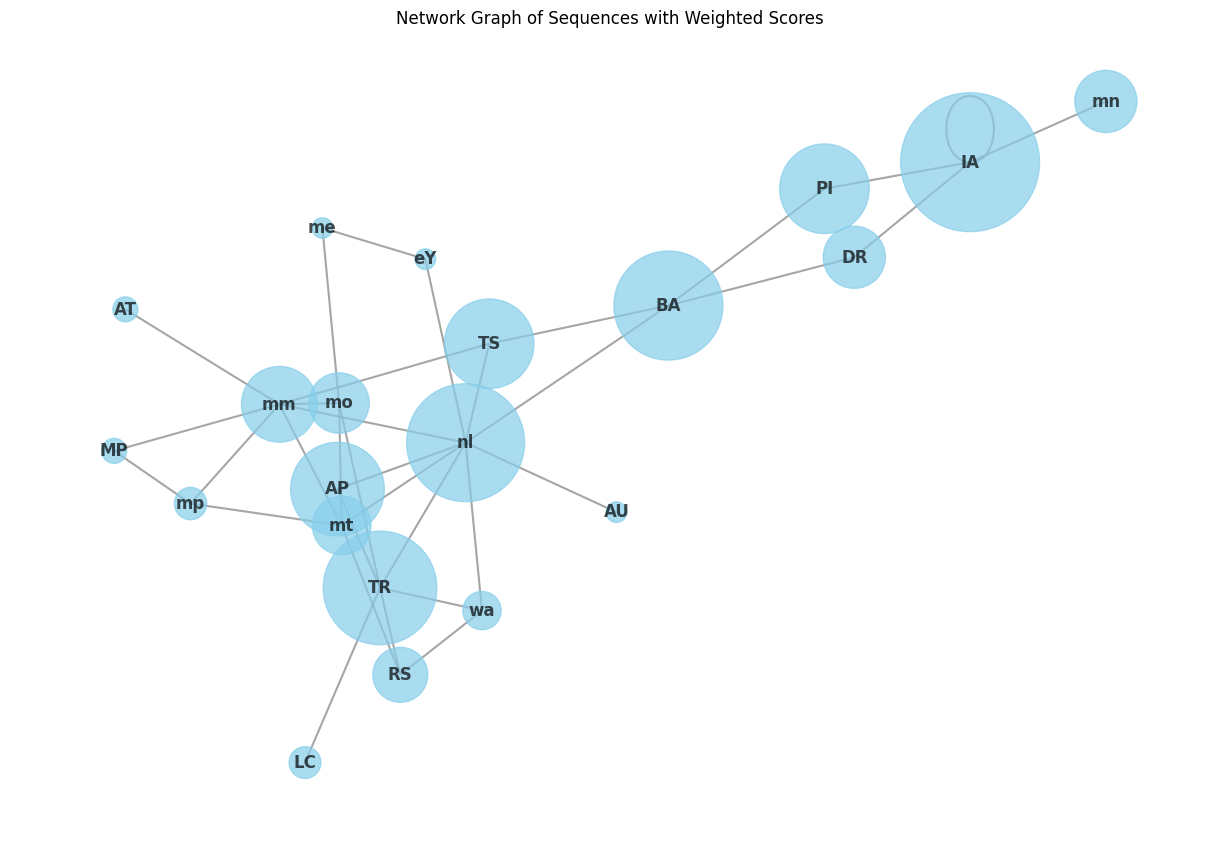

In [108]:
import networkx as nx
import matplotlib.pyplot as plt

# Define sequences and their weighted scores (assuming you have this data)
sequences = mos_df['MOS Sequence'].head(10)
weighted_scores = mos_df['weighted_score'].head(10)
print(sequences)
print(weighted_scores)

# Create an empty graph
G = nx.Graph()
# Add nodes (items) and edges (sequence connections) to the graph
for seq, score in zip(sequences, weighted_scores):
    items = seq.split()
    for item in items:
        if not G.has_node(item):
            G.add_node(item, weight=0)  # Initialize node weight
        G.nodes[item]['weight'] += score  # Update node weight
    for i in range(len(items) - 1):
        G.add_edge(items[i], items[i+1])

# Normalize node sizes
max_weight = max(nx.get_node_attributes(G, 'weight').values())
max_node_size = 10000 # Maximum desired node size
node_sizes = [G.nodes[item]['weight'] / max_weight * max_node_size for item in G.nodes]

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray', width=1.5, alpha=0.7)
plt.title('Network Graph of Sequences with Weighted Scores')
plt.show()
